# PROVIDEDH Collaborative platform
## Jupyter notebook

In [5]:
import re
import os
from functools import reduce
from lxml import etree as et
from lxml.etree import Element
import itertools
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
namespaces = {'tei': 'http://www.tei-c.org/ns/1.0', 'xml': 'http://www.w3.org/XML/1998/namespace'}

## 1 Data structures

In [283]:
len(list(dep_tree.iter()))

119

In [284]:
dep_path = 'depositions_subset/to_process/processed/dep_822013r014_tei_(original_normalized_depositions_marked_persons).xml'
with open(dep_path, 'r') as f:
    dep_raw = f.read()
dep_tree = et.fromstring(dep_raw.encode())
header_tags = dep_tree.find('.//tei:teiHeader', namespaces=namespaces).iter()
body_tags = dep_tree.find('.//tei:body', namespaces=namespaces).iter()
print(len(list(header_tags)),len(list(body_tags)))

55 59


In [190]:
stats_df = pd.DataFrame(columns=['tag', 'location', 'attr_count', 'attr_names', 'attr_values'])

In [191]:
for tag in header_tags:
    stats_df.loc[len(stats_df)] = {
        'tag': tag.tag,
        'location': 'header',
        'attr_count': len(tag.keys()),
        'attr_names': ','.join(tag.keys()),
        'attr_values': ','.join(tag.values()),
    }
for tag in body_tags:
    stats_df.loc[len(stats_df)] = {
        'tag': tag.tag,
        'location': 'body',
        'attr_count': len(tag.keys()),
        'attr_names': ','.join(tag.keys()),
        'attr_values': ','.join(tag.values()),
    }

In [423]:
stats_df

tag location attr_count attr_names  \
0      {http://www.tei-c.org/ns/1.0}teiHeader   header          0              
1       {http://www.tei-c.org/ns/1.0}fileDesc   header          0              
2      {http://www.tei-c.org/ns/1.0}titleStmt   header          0              
3          {http://www.tei-c.org/ns/1.0}title   header          0              
4    {http://www.tei-c.org/ns/1.0}editionStmt   header          0              
..                                        ...      ...        ...        ...   
109     {http://www.tei-c.org/ns/1.0}rolename     body          1       type   
110         {http://www.tei-c.org/ns/1.0}name     body          0              
111       {http://www.tei-c.org/ns/1.0}signed     body          0              
112     {http://www.tei-c.org/ns/1.0}rolename     body          1       type   
113         {http://www.tei-c.org/ns/1.0}name     body          0              

      attr_values  
0                  
1                  
2                  
3                  
4                  
..            ...  
109  commissioner  
110                
111                
112  commissioner  
113                

[114 rows x 5 columns]

In [419]:
tags.describe()

location                      \
                                                count unique     top freq   
tag                                                                         
<cyfunction Comment at 0x7f56fd02c8e8>              1      1  header    1   
include                                             2      1  header    2   
resp                                                2      1  header    2   
{http://www.tei-c.org/ns/1.0}add                    2      1    body    2   
{http://www.tei-c.org/ns/1.0}body                   1      1    body    1   
{http://www.tei-c.org/ns/1.0}change                 1      1  header    1   
{http://www.tei-c.org/ns/1.0}charDecl               1      1  header    1   
{http://www.tei-c.org/ns/1.0}closer                 3      1    body    3   
{http://www.tei-c.org/ns/1.0}country                2      1  header    2   
{http://www.tei-c.org/ns/1.0}creation               1      1  header    1   
{http://www.tei-c.org/ns/1.0}date                   5      2    body    4   
{http://www.tei-c.org/ns/1.0}div                    3      1    body    3   
{http://www.tei-c.org/ns/1.0}edition                1      1  header    1   
{http://www.tei-c.org/ns/1.0}editionStmt            1      1  header    1   
{http://www.tei-c.org/ns/1.0}encodingDesc           1      1  header    1   
{http://www.tei-c.org/ns/1.0}faith                  1      1  header    1   
{http://www.tei-c.org/ns/1.0}fileDesc               1      1  header    1   
{http://www.tei-c.org/ns/1.0}forename               1      1  header    1   
{http://www.tei-c.org/ns/1.0}include                1      1  header    1   
{http://www.tei-c.org/ns/1.0}keywords               2      1  header    2   
{http://www.tei-c.org/ns/1.0}langUsage              1      1  header    1   
{http://www.tei-c.org/ns/1.0}language               1      1  header    1   
{http://www.tei-c.org/ns/1.0}list                   2      1  header    2   
{http://www.tei-c.org/ns/1.0}listPerson             1      1  header    1   
{http://www.tei-c.org/ns/1.0}listPlace              1      1  header    1   
{http://www.tei-c.org/ns/1.0}name                   8      1    body    8   
{http://www.tei-c.org/ns/1.0}nationality            1      1  header    1   
{http://www.tei-c.org/ns/1.0}occupation             1      1  header    1   
{http://www.tei-c.org/ns/1.0}p                      4      1    body    4   
{http://www.tei-c.org/ns/1.0}particDesc             2      1  header    2   
{http://www.tei-c.org/ns/1.0}pb                     4      1    body    4   
{http://www.tei-c.org/ns/1.0}persName               1      1  header    1   
{http://www.tei-c.org/ns/1.0}person                 7      2    body    6   
{http://www.tei-c.org/ns/1.0}placeName             10      2    body    8   
{http://www.tei-c.org/ns/1.0}profileDesc            1      1  header    1   
{http://www.tei-c.org/ns/1.0}pubPlace               1      1  header    1   
{http://www.tei-c.org/ns/1.0}publicationStmt        1      1  header    1   
{http://www.tei-c.org/ns/1.0}publisher              1      1  header    1   
{http://www.tei-c.org/ns/1.0}region                 1      1  header    1   
{http://www.tei-c.org/ns/1.0}residence              1      1  header    1   
{http://www.tei-c.org/ns/1.0}respStmt               2      1  header    2   
{http://www.tei-c.org/ns/1.0}revisionDesc           1      1  header    1   
{http://www.tei-c.org/ns/1.0}roleName               5      2    body    4   
{http://www.tei-c.org/ns/1.0}rolename               2      1    body    2   
{http://www.tei-c.org/ns/1.0}signed                 6      1    body    6   
{http://www.tei-c.org/ns/1.0}sourceDesc             1      1  header    1   
{http://www.tei-c.org/ns/1.0}supplied               2      1    body    2   
{http://www.tei-c.org/ns/1.0}surname                1      1  header    1   
{http://www.tei-c.org/ns/1.0}teiHeader              1      1  header    1   
{http://www.tei-c.org/ns/1.0}textClass   

In [412]:
with_attr = stats_df[stats_df['attr_count'] > 0]
tags = stats_df.groupby('tag')
stats_df.describe()

tag location  attr_count  \
count                                      114      114         114   
unique                                      54        2           3   
top     {http://www.tei-c.org/ns/1.0}placeName     body           0   
freq                                        10       59          69   

       attr_names attr_values  
count         114         114  
unique         13          33  
top                            
freq           69          69

In [525]:
data = tags.get_group('{http://www.tei-c.org/ns/1.0}date')

zip_attributes = lambda y: list(zip(y[1]['attr_names'].split(','), y[1]['attr_values'].split(',')))

attributes = reduce(lambda ac,dc: ac + zip_attributes(dc), data.iterrows(), [])
attributes_df = pd.DataFrame(attributes, columns=['name','value'])

attr_names = attributes_df[attributes_df['name'] != ''].groupby('name')

In [526]:
attr_names.describe()

value                     
     count unique      top freq
name                           
when     5      4  --02-01    2

In [534]:
def show_tag(tag, tags):
    trim_namespace = lambda t: t.split('}')[1] if '}' in t else t
    data = tags.get_group(tag)
    tag_name = trim_namespace(tag)
    
    zip_attributes = lambda y: list(zip(y[1]['attr_names'].split(','), y[1]['attr_values'].split(',')))
    
    attributes = reduce(lambda ac,dc: ac + zip_attributes(dc), data.iterrows(), [])
    attributes_df = pd.DataFrame(attributes, columns=['name','value'])
    
    attr_names = attributes_df[attributes_df['name'] != ''].groupby('name')
    
    in_header = reduce(lambda ac,dc: ac+1 if dc else ac, data['location']=='header',0)
    in_body = reduce(lambda ac,dc: ac+1 if dc else ac, data['location']=='body',0)
    
    # Plt config
    fig = plt.figure(constrained_layout=True, figsize=(22,10))
    gs = fig.add_gridspec(ncols=4, nrows=2)

    # Top - Left : Summary
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.axes.get_xaxis().set_visible(False)
    ax0.axes.get_yaxis().set_visible(False)
    ax0.text(0.1, 0.9, 'Tag name : '+tag_name, fontsize=27)
    ax0.text(0.1, 0.8, f'Tag count : {len(data)}', fontsize=27)
    ax0.text(0.1, 0.7, f'{len(attr_names)} distinct attribute types', fontsize=27)
    

    # Bottom-Left : Location in document
    ax1 = fig.add_subplot(gs[1, 0])
    ax1.tick_params(labelsize=20)
    ax1.set_title('Location')

    ax1.bar([0],[in_header], label='Header')
    ax1.bar([0],[-in_body], label='Body')

    ax1.axes.get_xaxis().set_visible(False)
    ax1.set_yticklabels([])
    ax1.legend(fontsize=22, facecolor='white', fancybox=True, framealpha=1, shadow=True, borderpad=1)
    plt.legend(fontsize=22, facecolor='white', fancybox=True, framealpha=1, shadow=True, borderpad=1)

    # Top - Right : Location in document
    ax2 = fig.add_subplot(gs[0, 1:3])
    ax2.tick_params(labelsize=20)
    ax2.set_title('Number of Occurences per Attribute ')
    if len(attr_names) == 0:
        ax2.text(0.3, 0.5, 'No attributes present\nfor this tag', fontsize=27)
    else:
        attr_count = list(attr_names.describe()['value']['count'])
    
        ax2.bar(x=tuple(attr_names.groups.keys()), height=attr_count) 
        x_ticks = [trim_namespace(x) 
                   for x 
                   in attr_names.groups.keys()]
        ax2.set_xticklabels(x_ticks)
             
    # Bottom - Right : Distinct attributes             
    ax3 = fig.add_subplot(gs[1, 1:3])
    ax3.tick_params(labelsize=20)
    ax3.set_title('Number of Distinct Values per Attribute')
    if len(attr_names) == 0:
        ax3.text(0.3, 0.5, 'No attributes present\nfor this tag', fontsize=27)
    else:
        attr_dist_values = list(attr_names.describe()['value']['unique'])
        attr_top = list(attr_names.describe()['value']['top'])
    
        ax3.bar(x=tuple(attr_names.groups.keys()), height=attr_dist_values) 
        x_ticks = [f'{trim_namespace(x[0])}\nTop: "{trim_namespace(x[1])}"' 
                   for x 
                   in zip(tuple(attr_names.groups.keys()), attr_top)]
        ax3.set_xticklabels(x_ticks)

    fig.show()

## 2 File processing

In [531]:
print(plt.style.available)

['seaborn-poster', 'seaborn-talk', 'ggplot', 'seaborn-muted', 'seaborn-pastel', 'bmh', 'seaborn', 'fast', 'seaborn-bright', 'seaborn-dark-palette', 'dark_background', 'seaborn-dark', 'seaborn-paper', 'seaborn-white', 'seaborn-darkgrid', 'tableau-colorblind10', 'grayscale', 'classic', 'seaborn-colorblind', 'seaborn-whitegrid', 'seaborn-notebook', '_classic_test', 'Solarize_Light2', 'seaborn-ticks', 'seaborn-deep', 'fivethirtyeight']


/home/alex/projects/collaborative-platform_venv/lib/python3.6/site-packages/ipykernel_launcher.py:73: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/alex/projects/collaborative-platform_venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


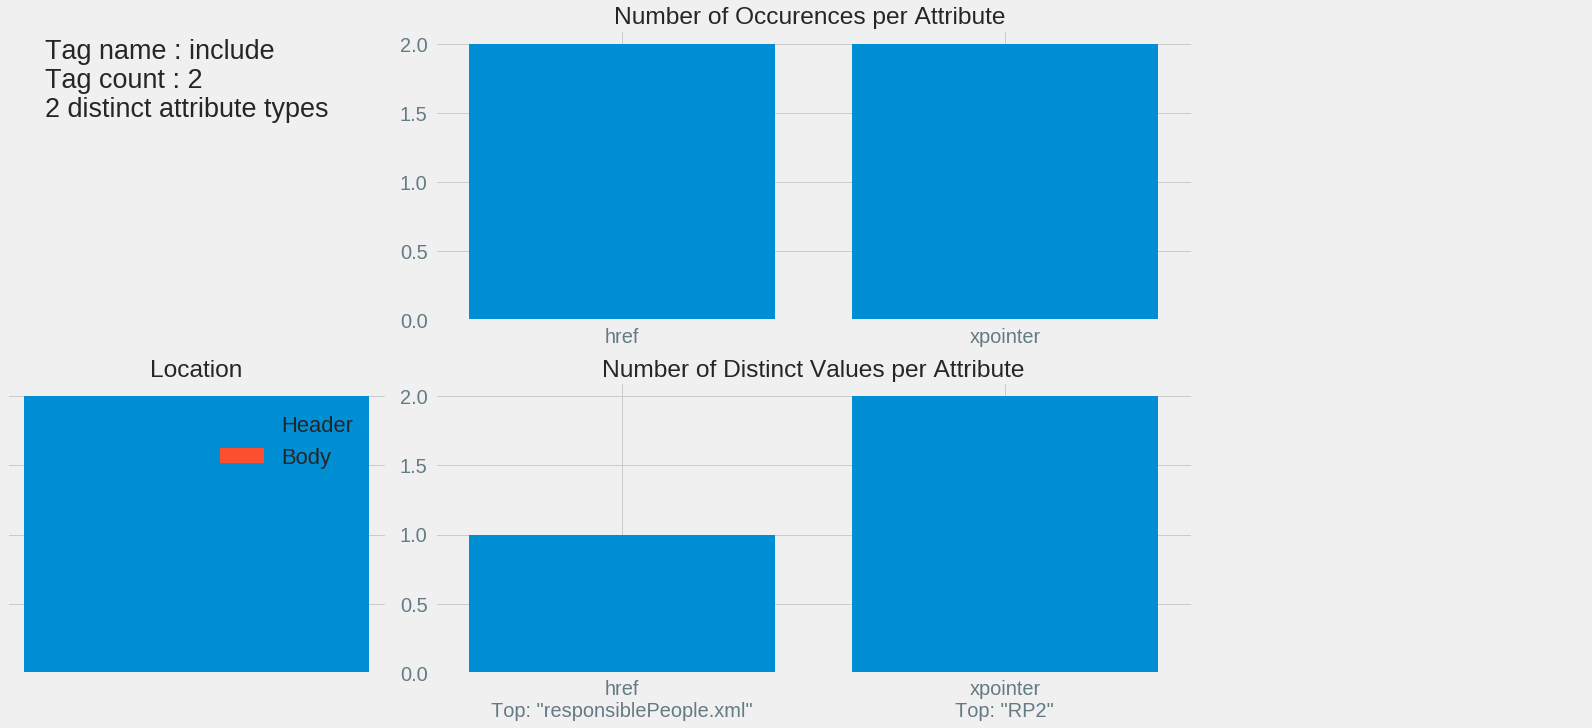

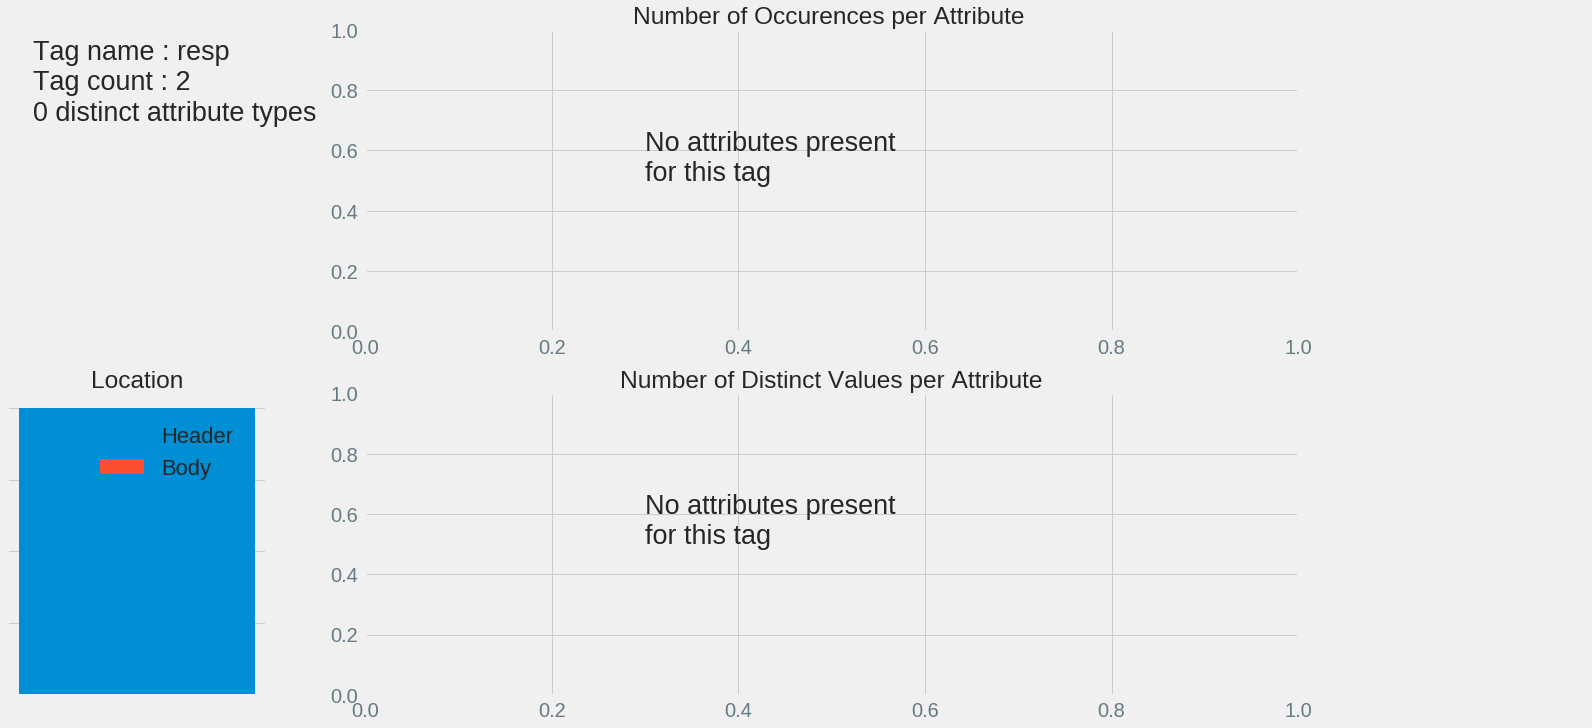

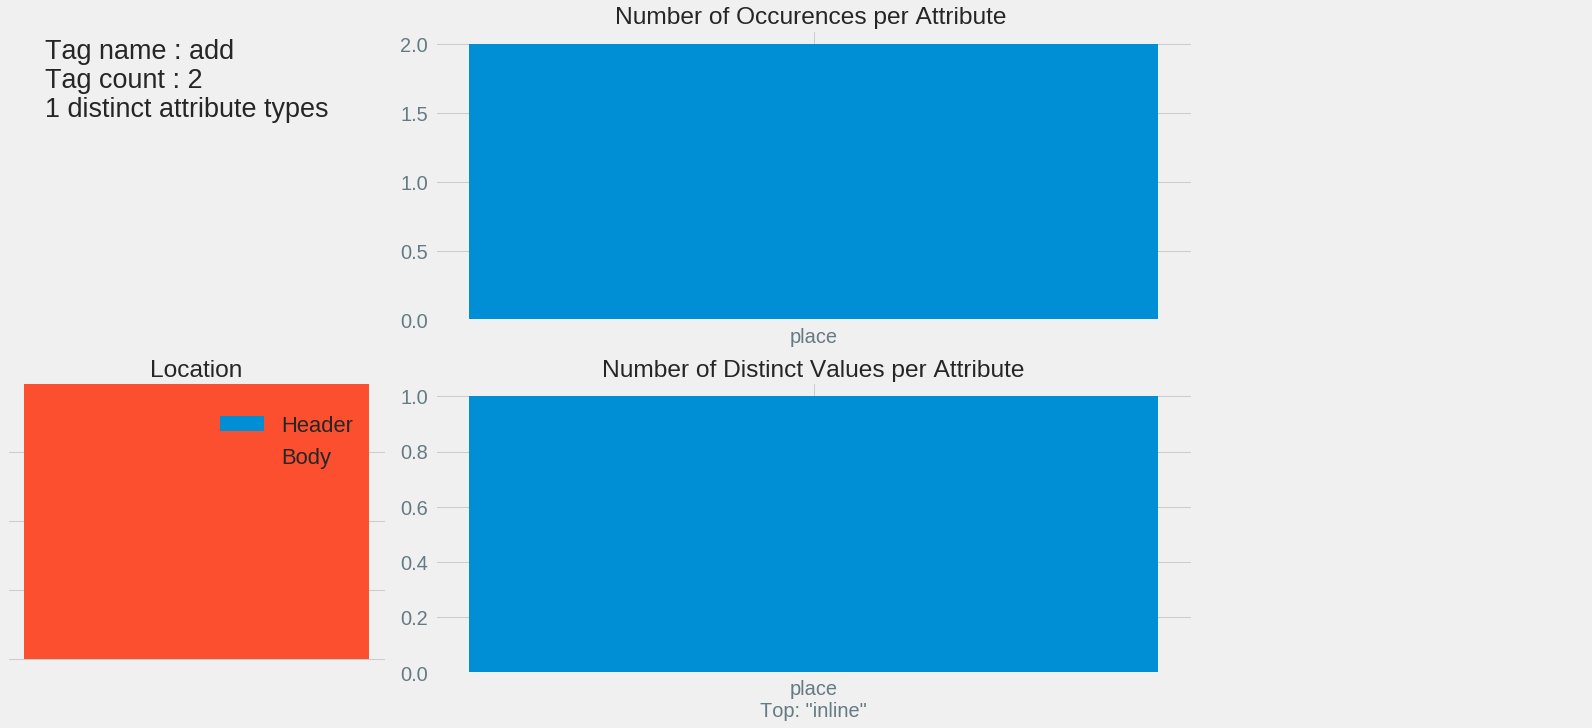

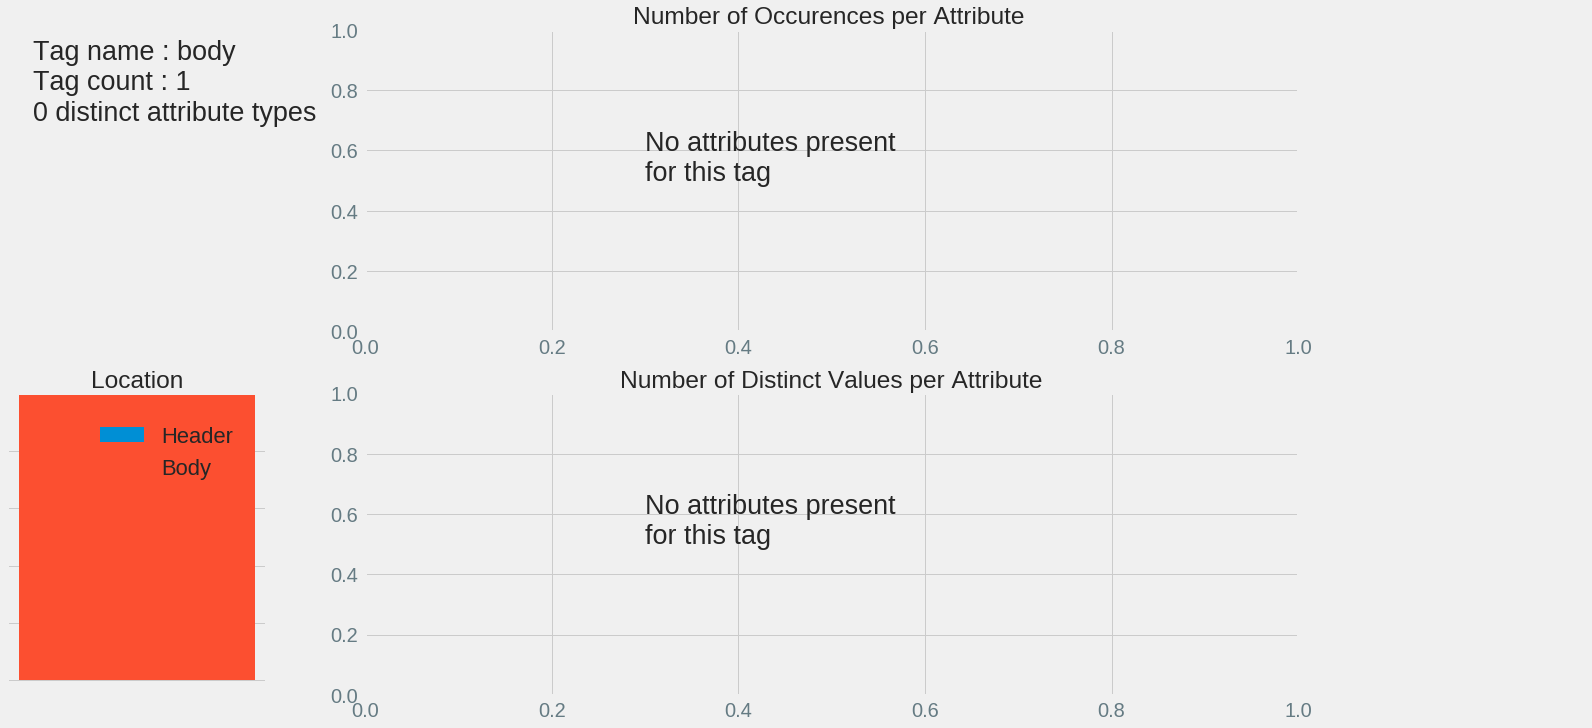

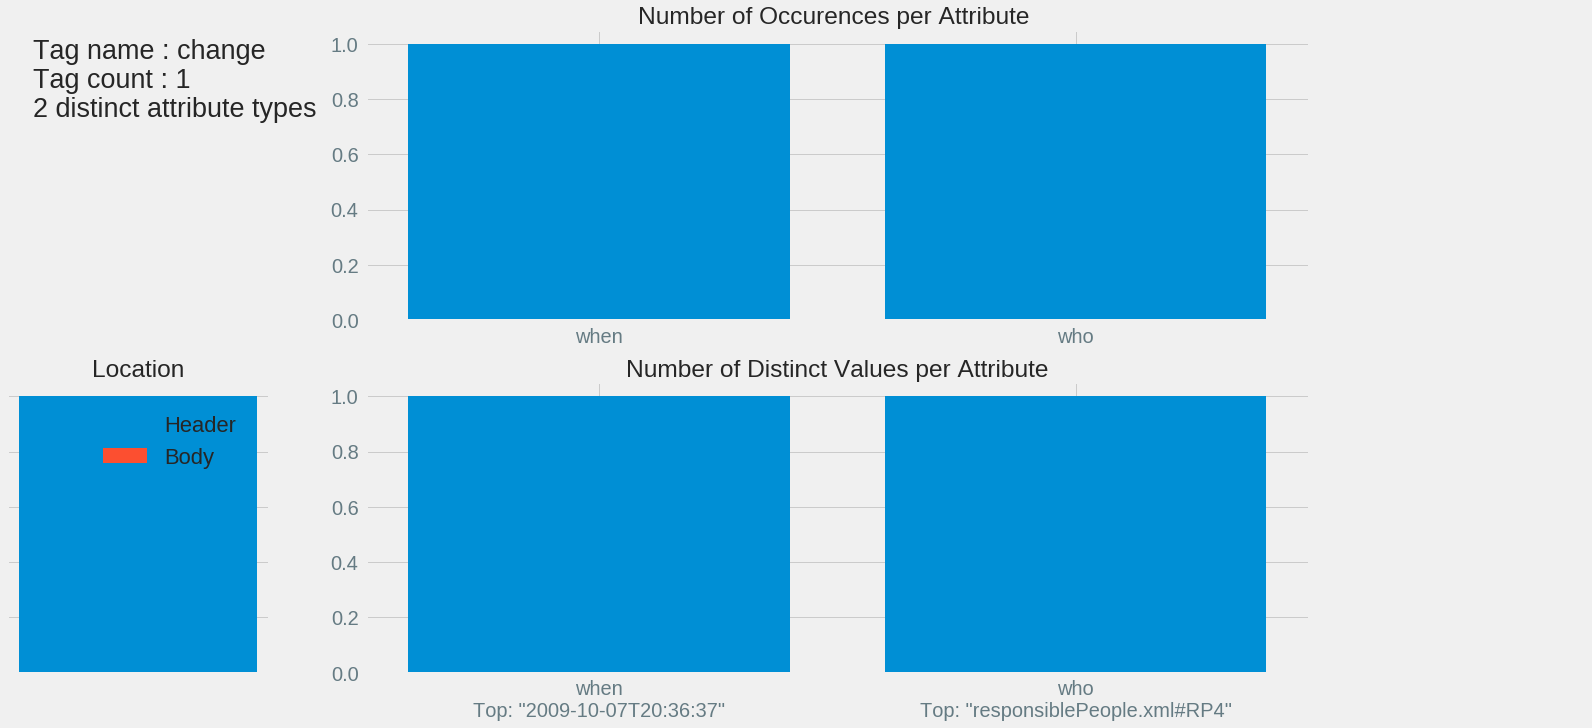

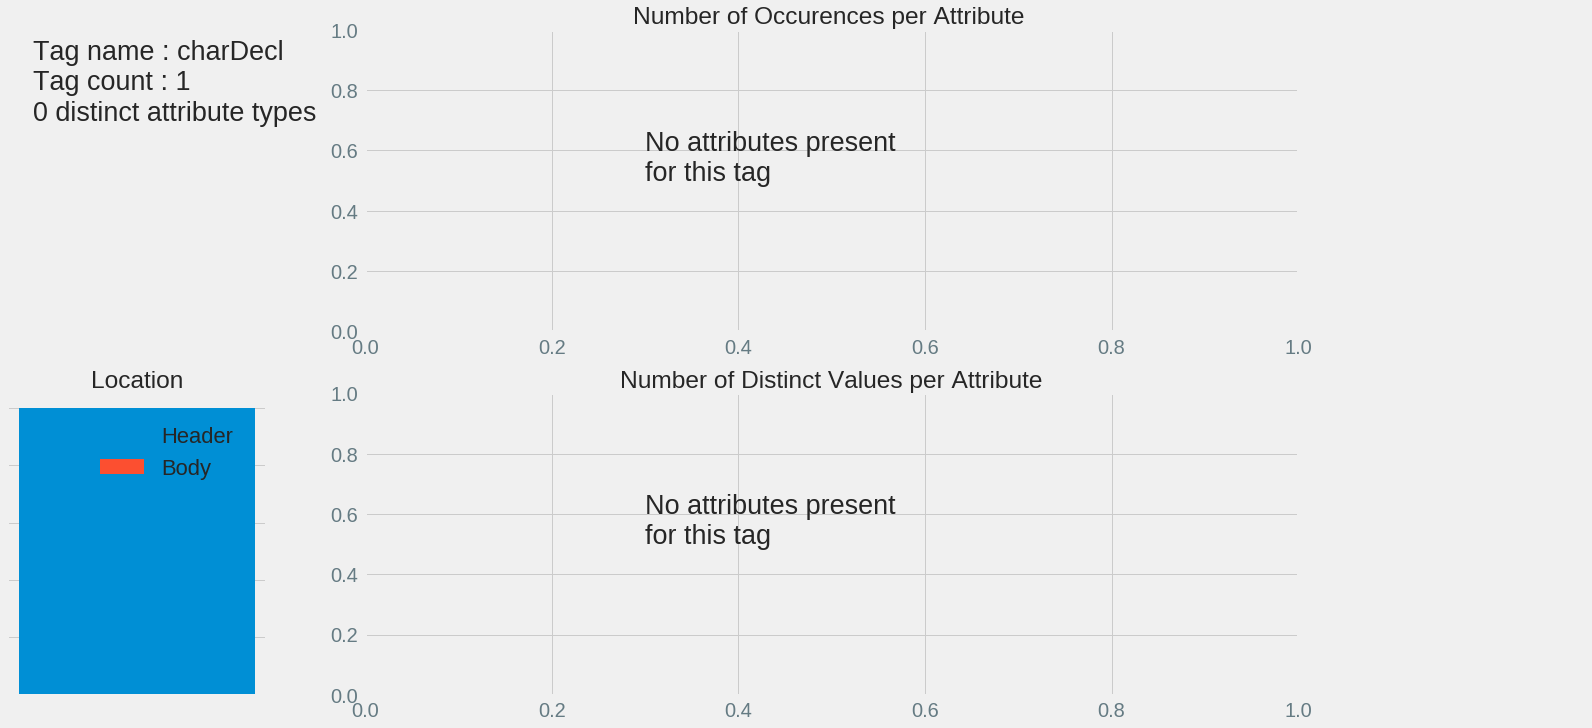

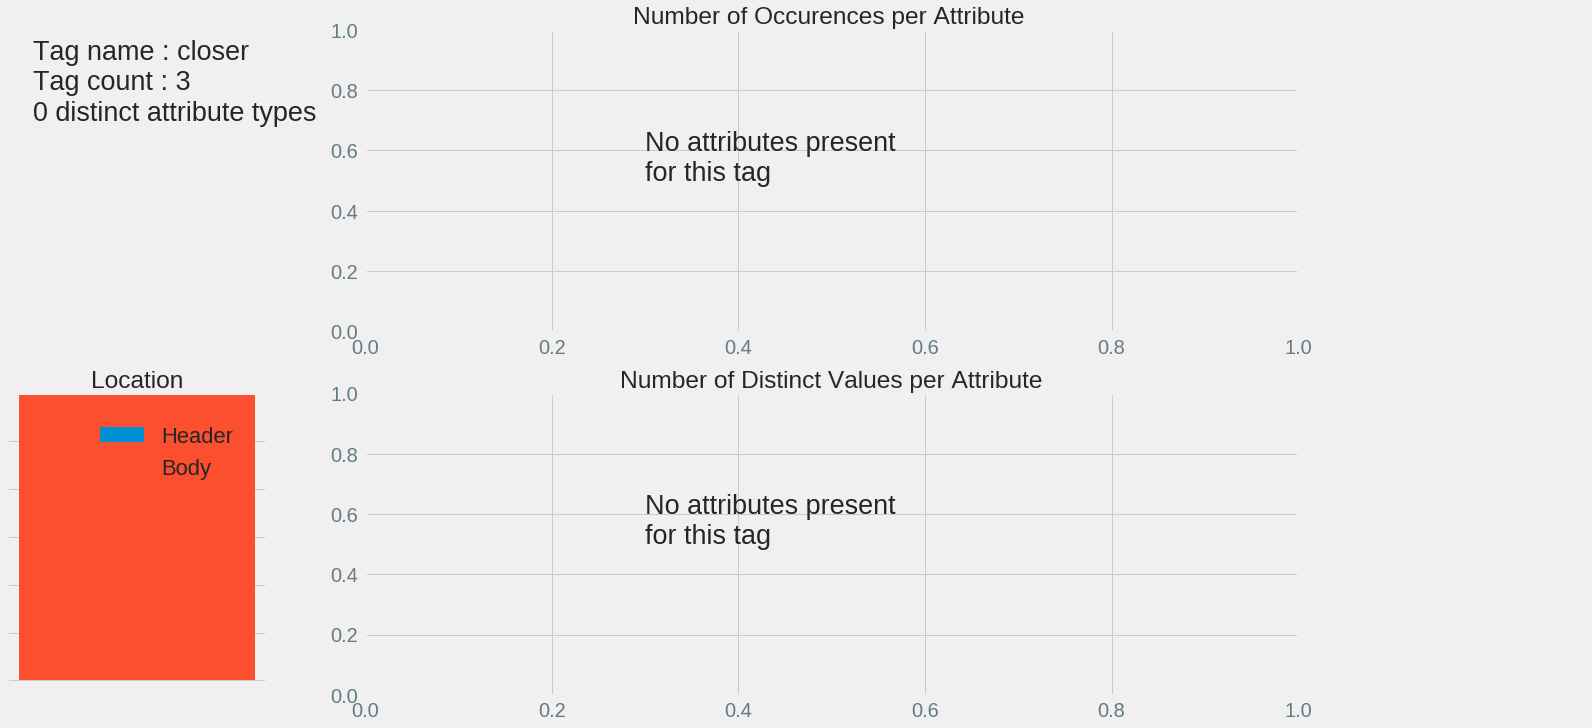

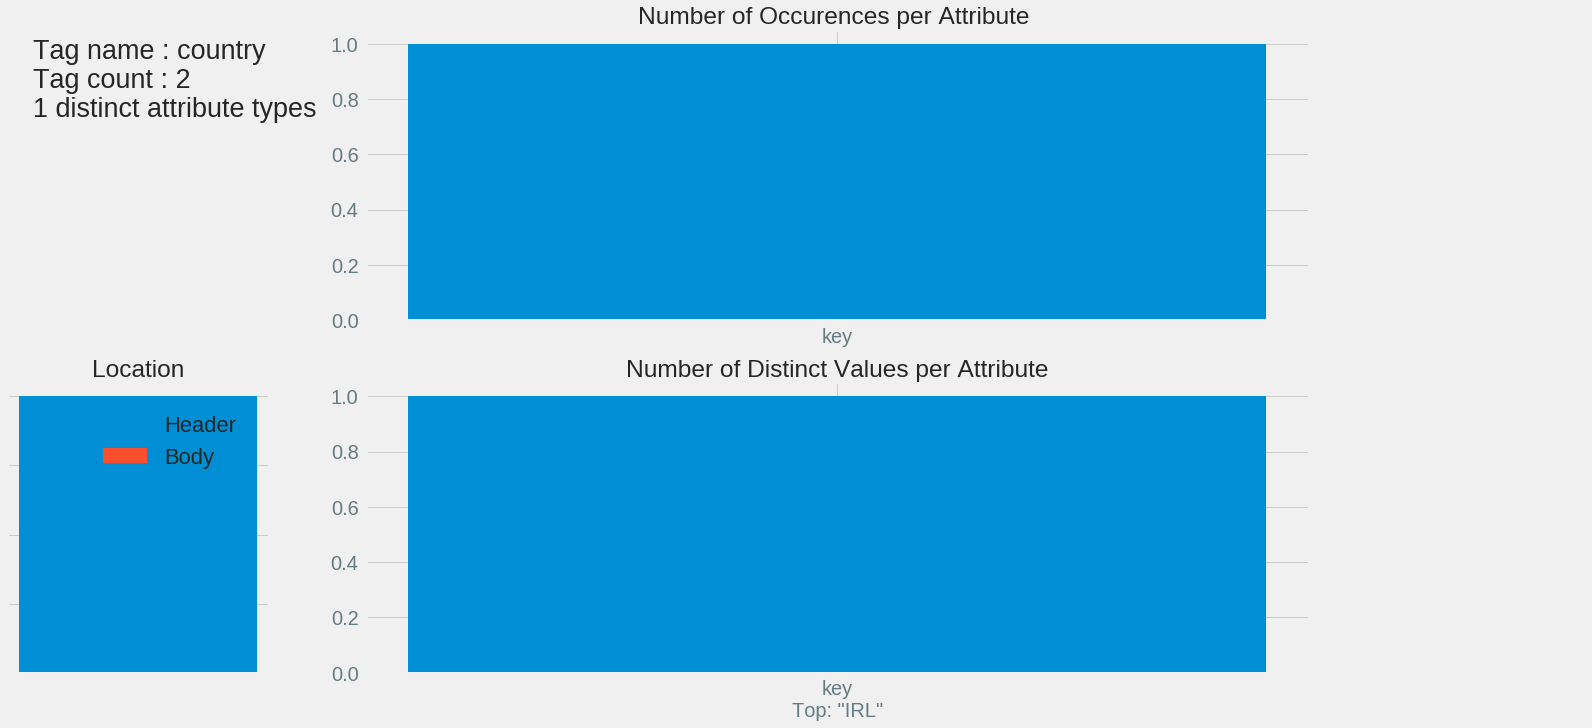

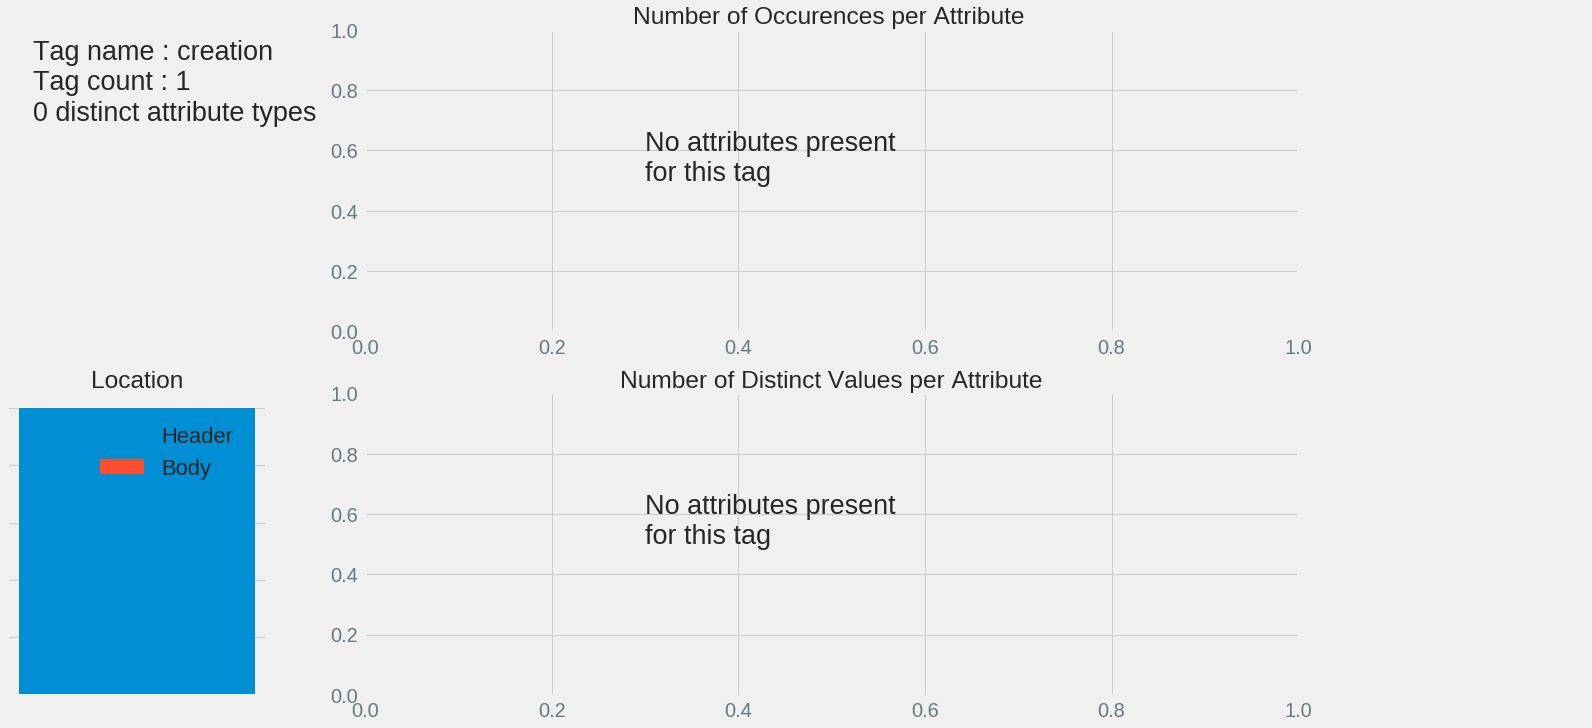

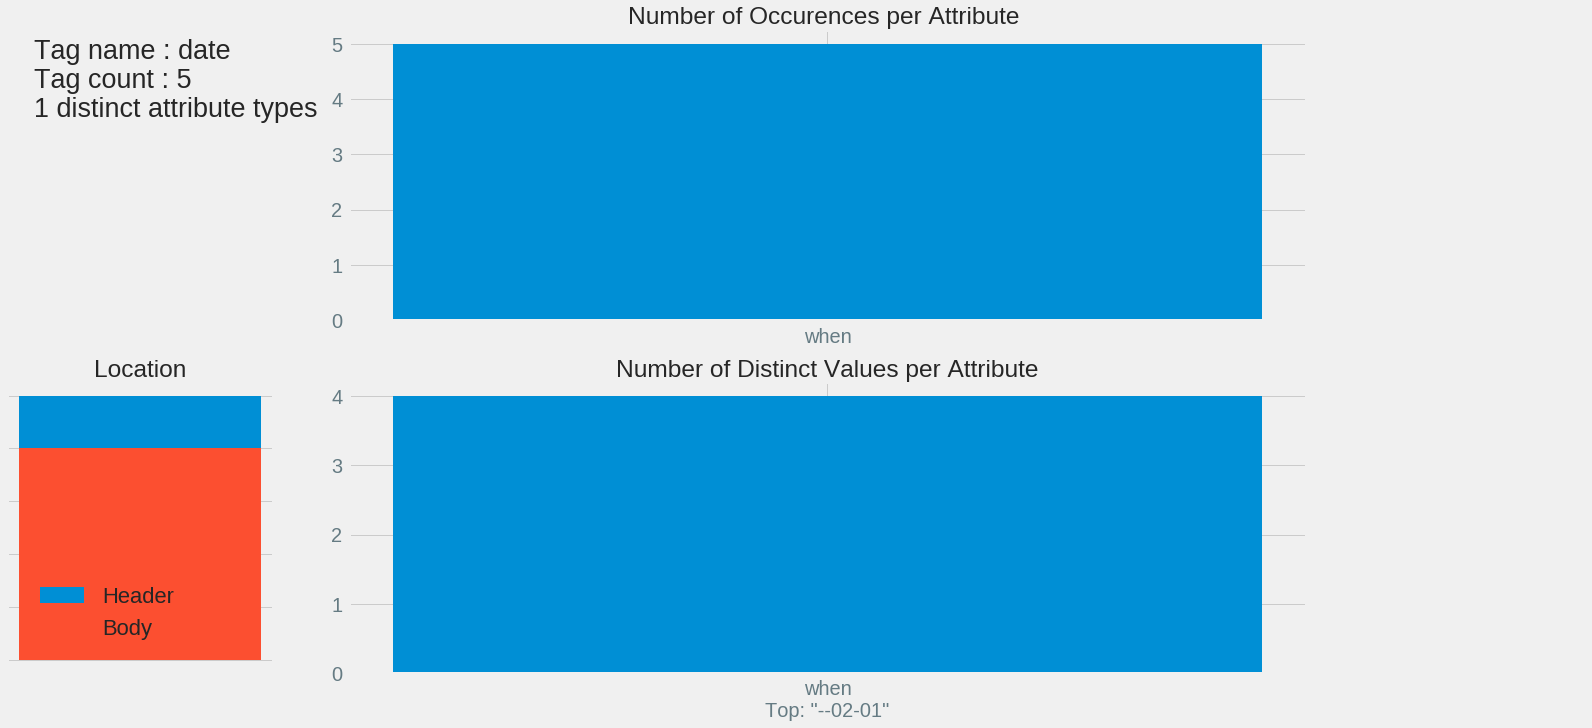

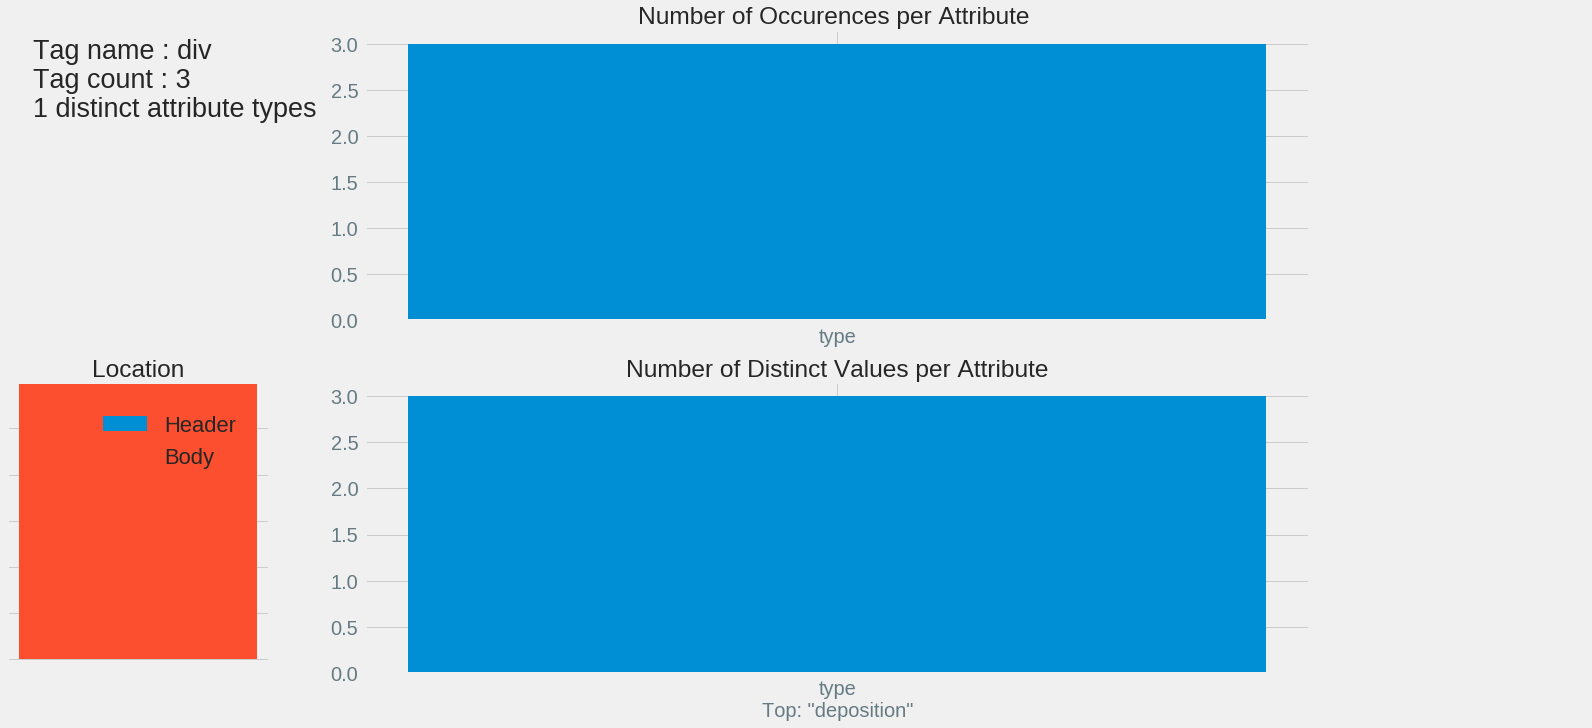

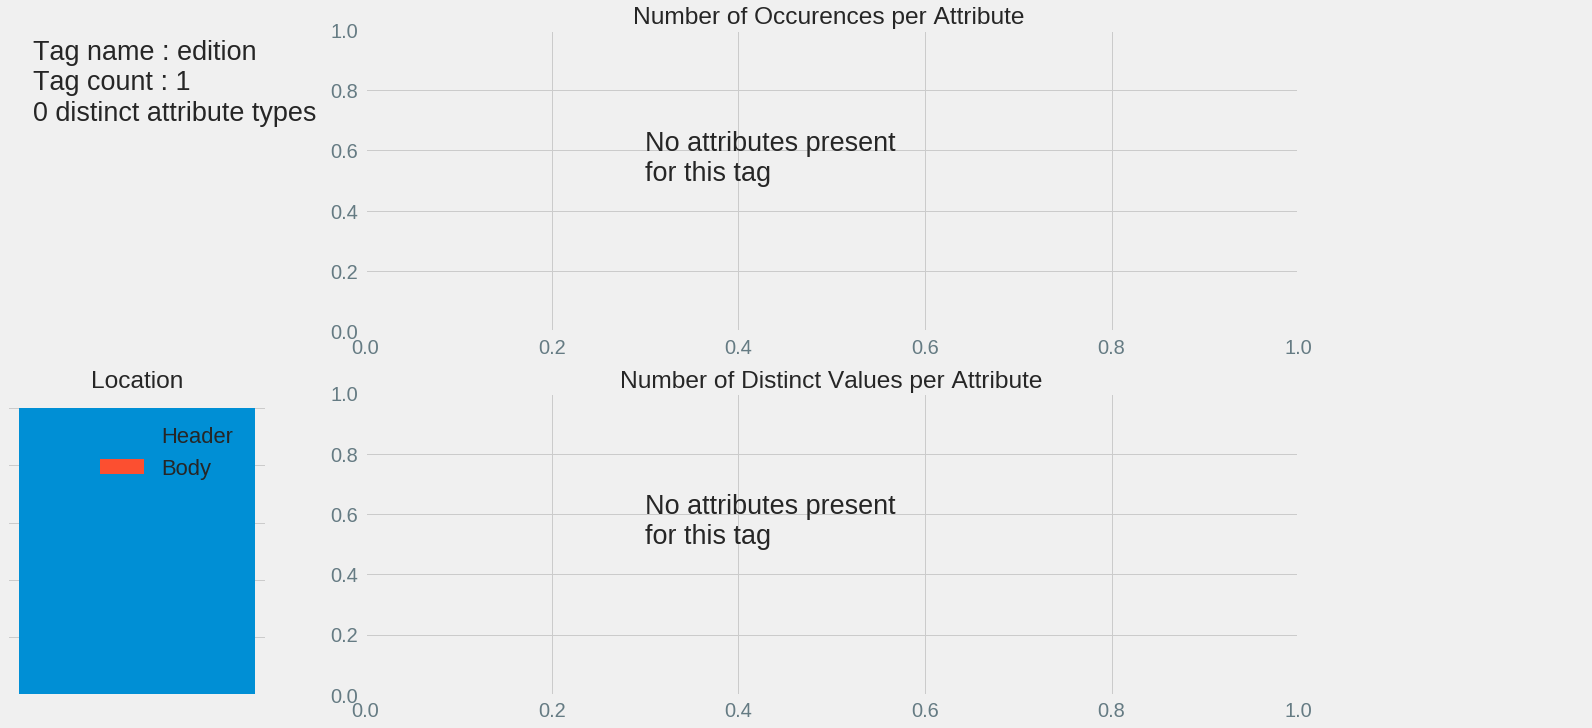

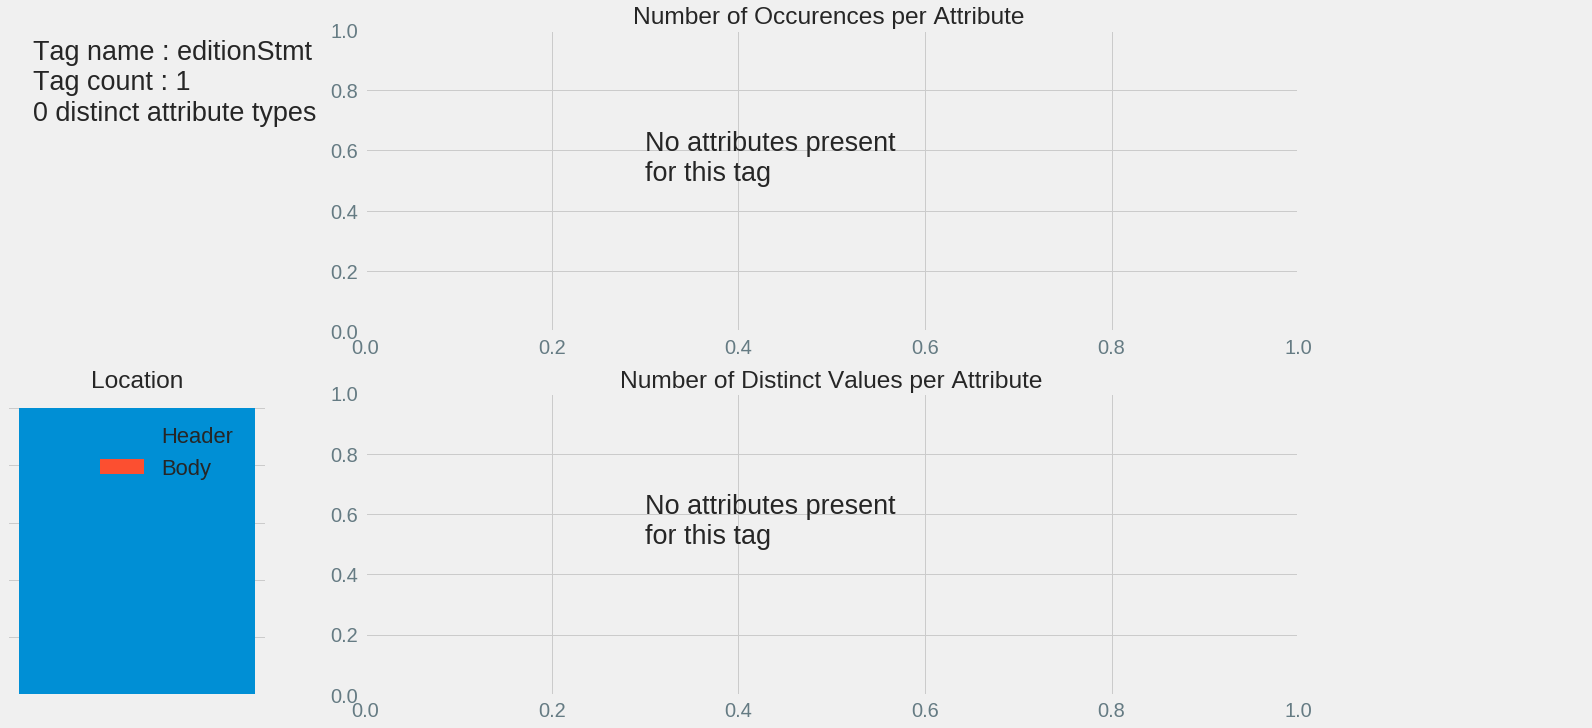

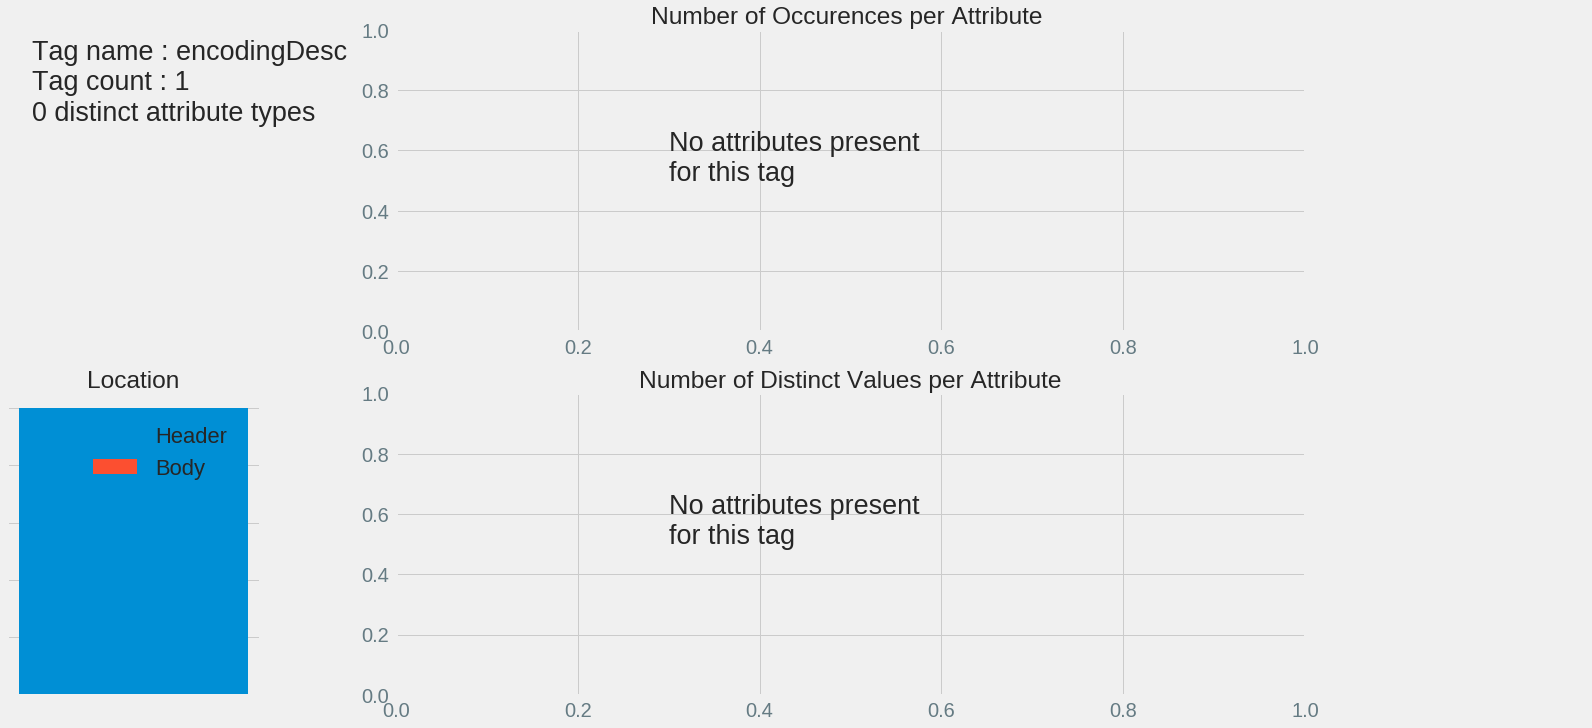

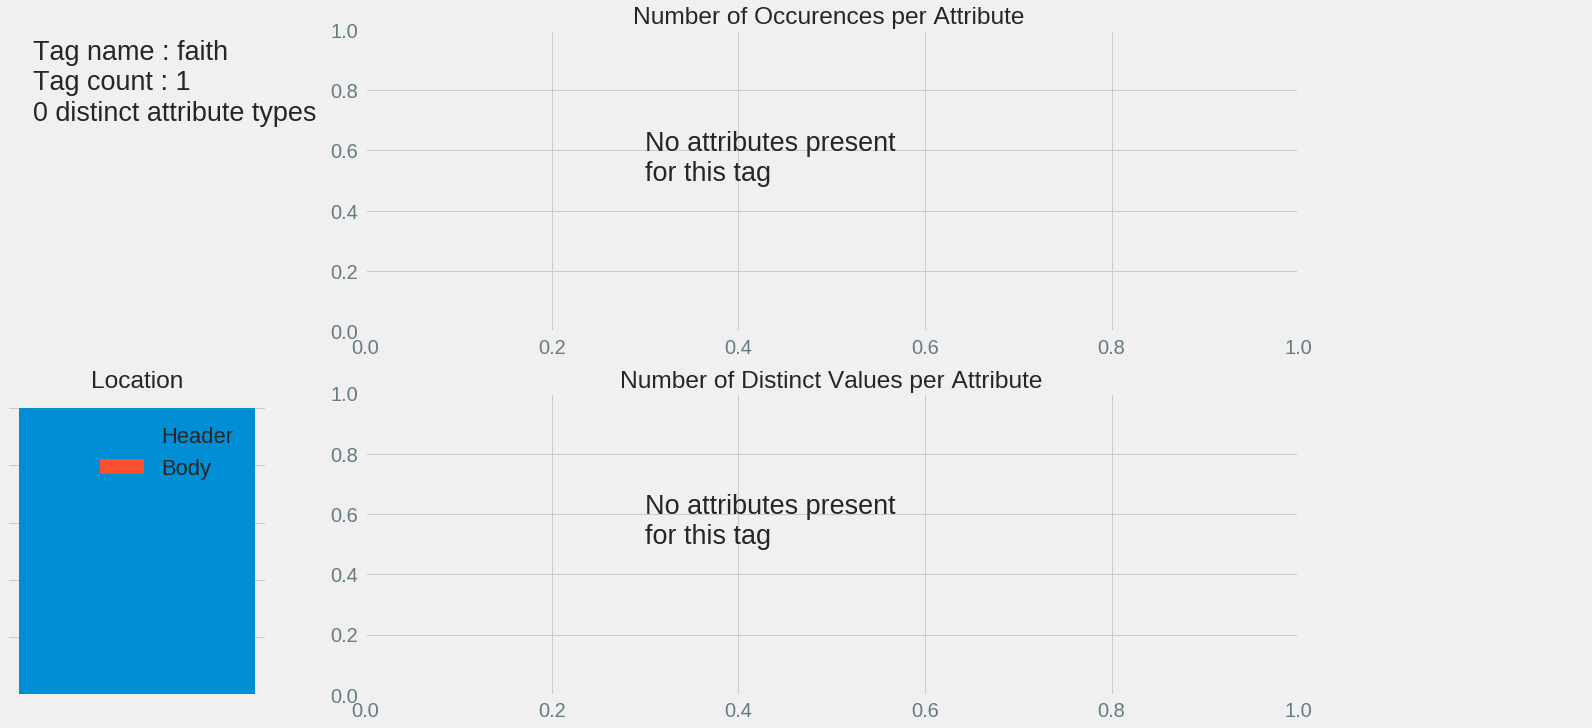

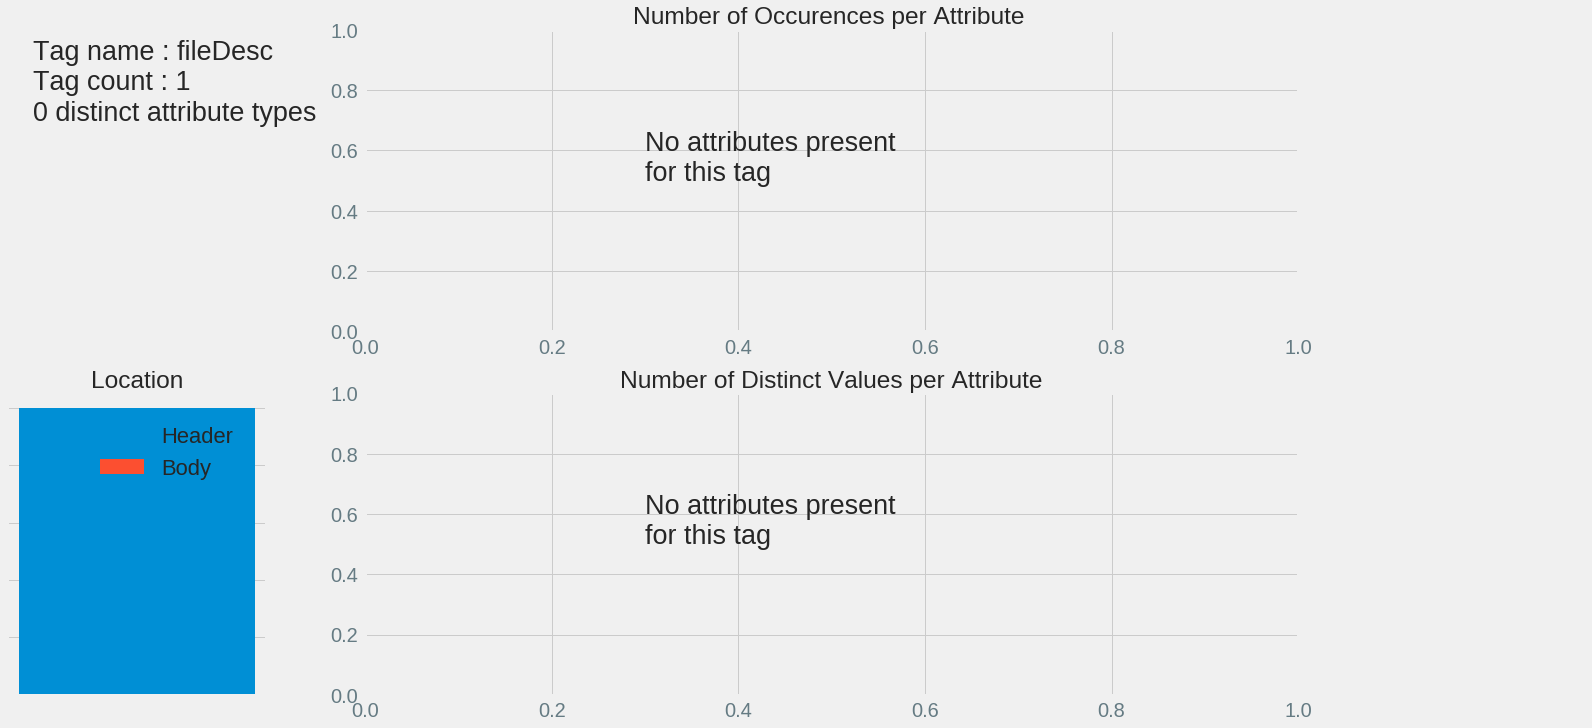

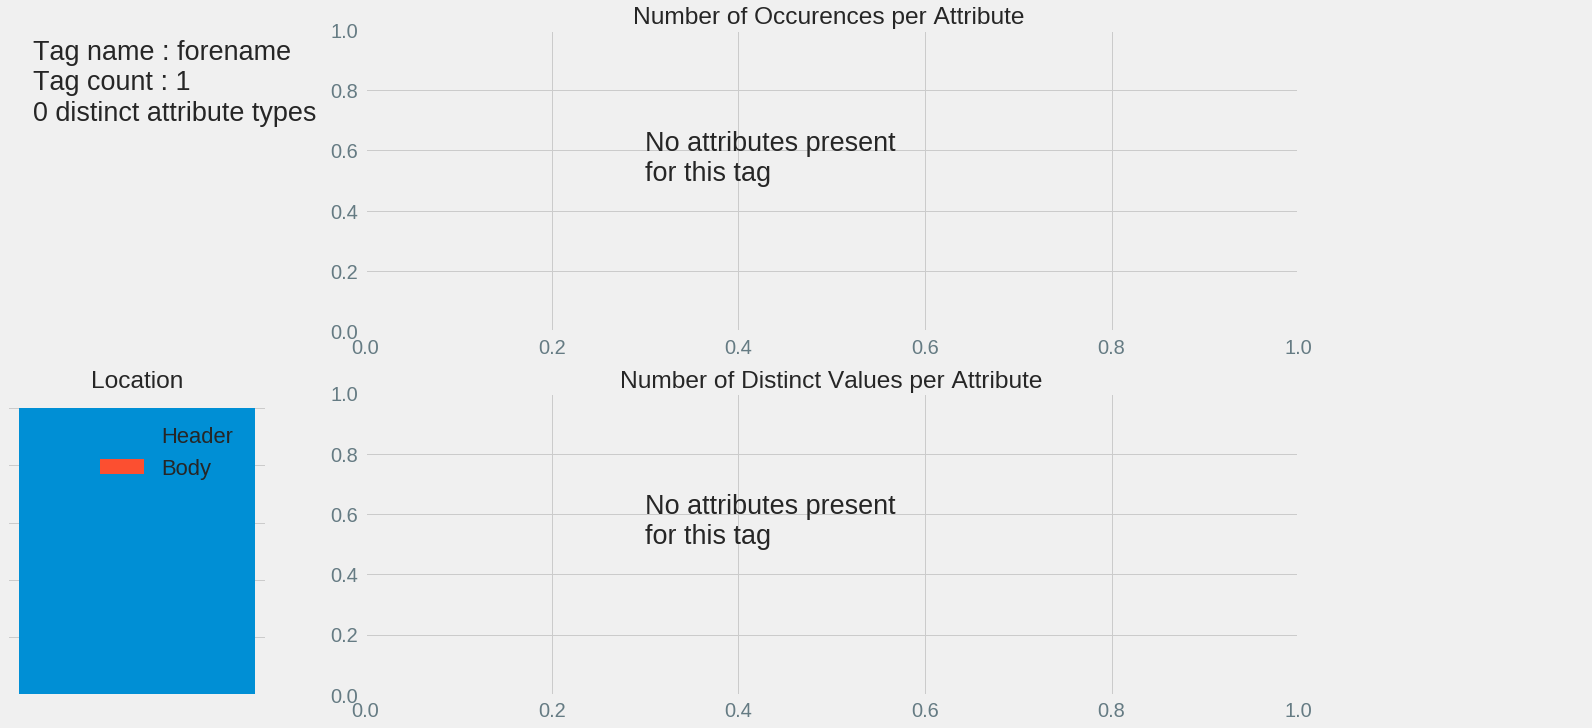

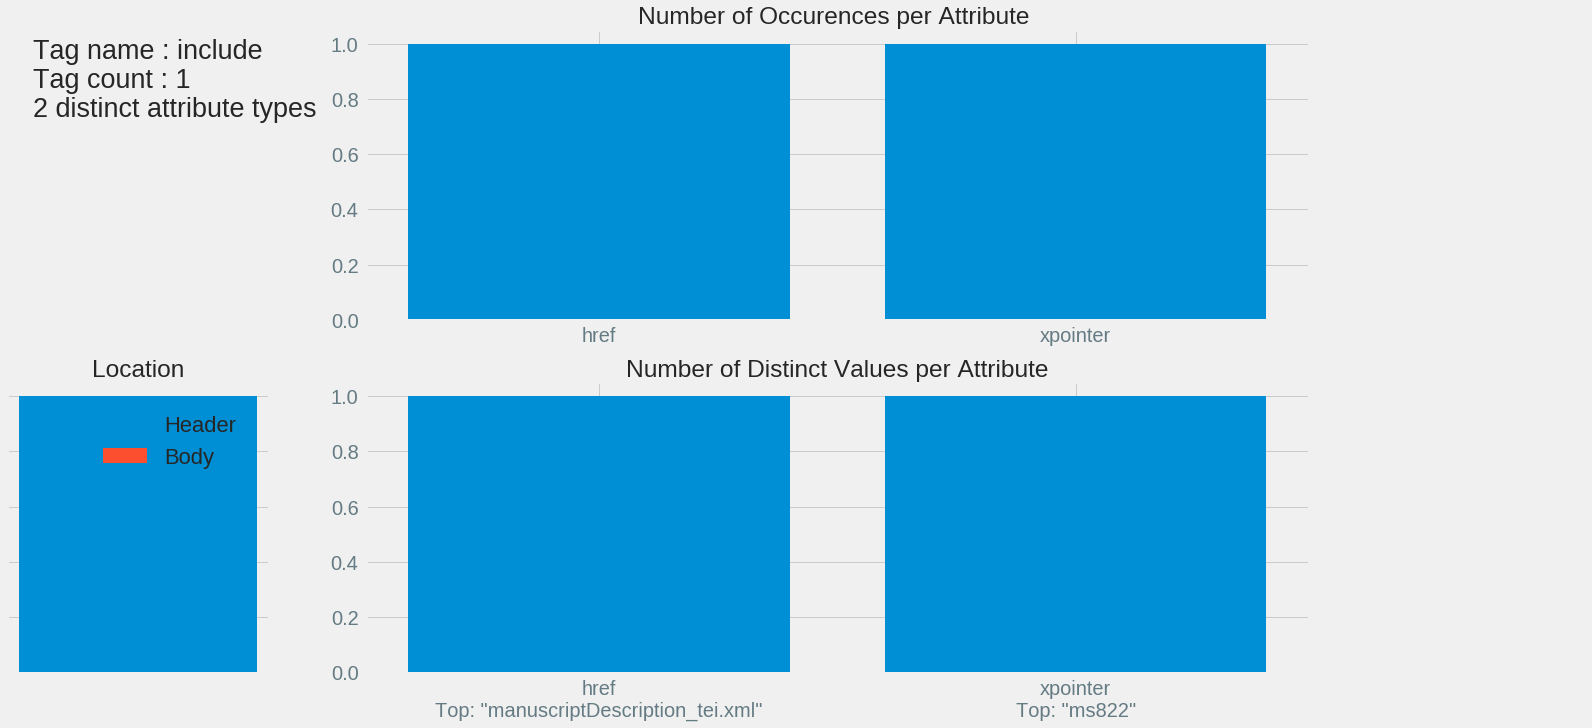

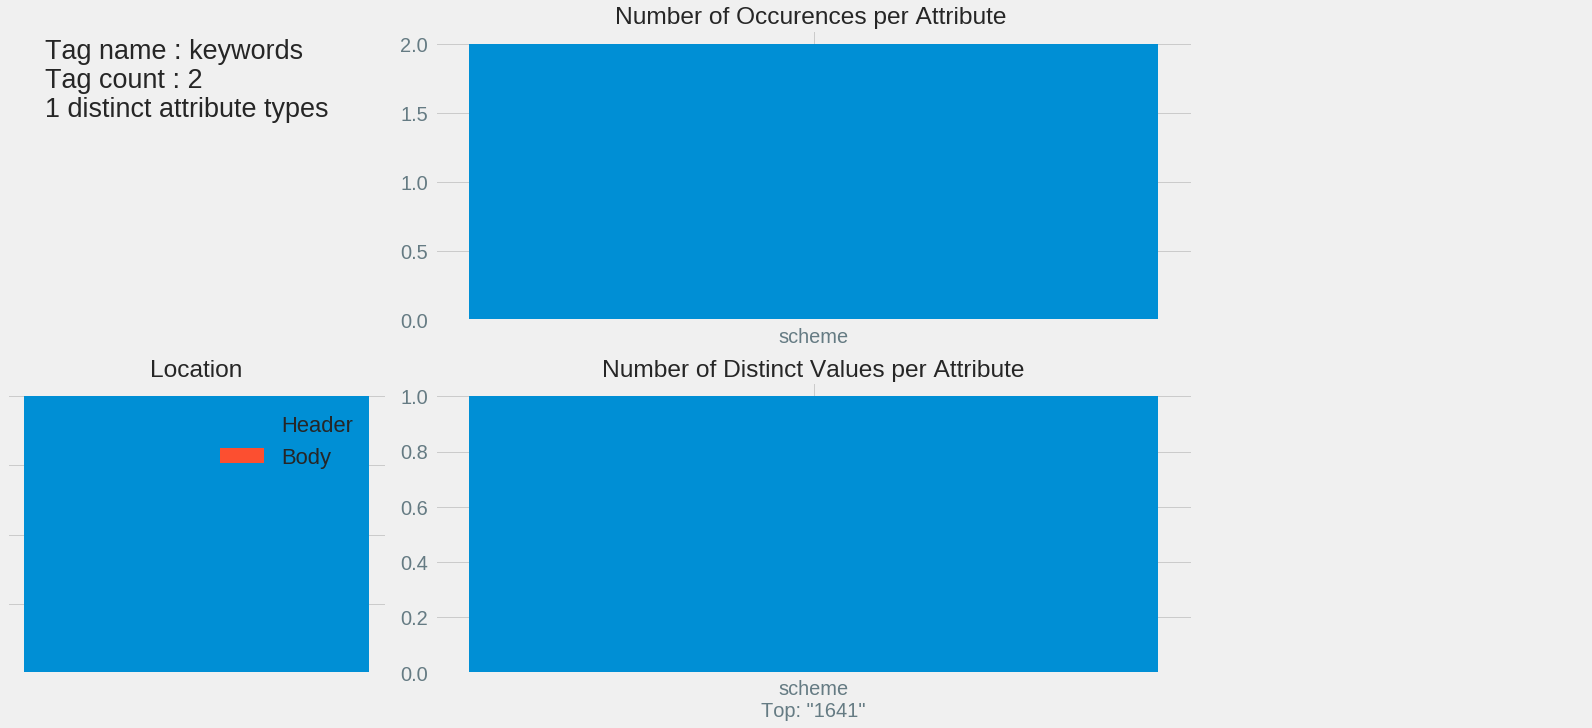

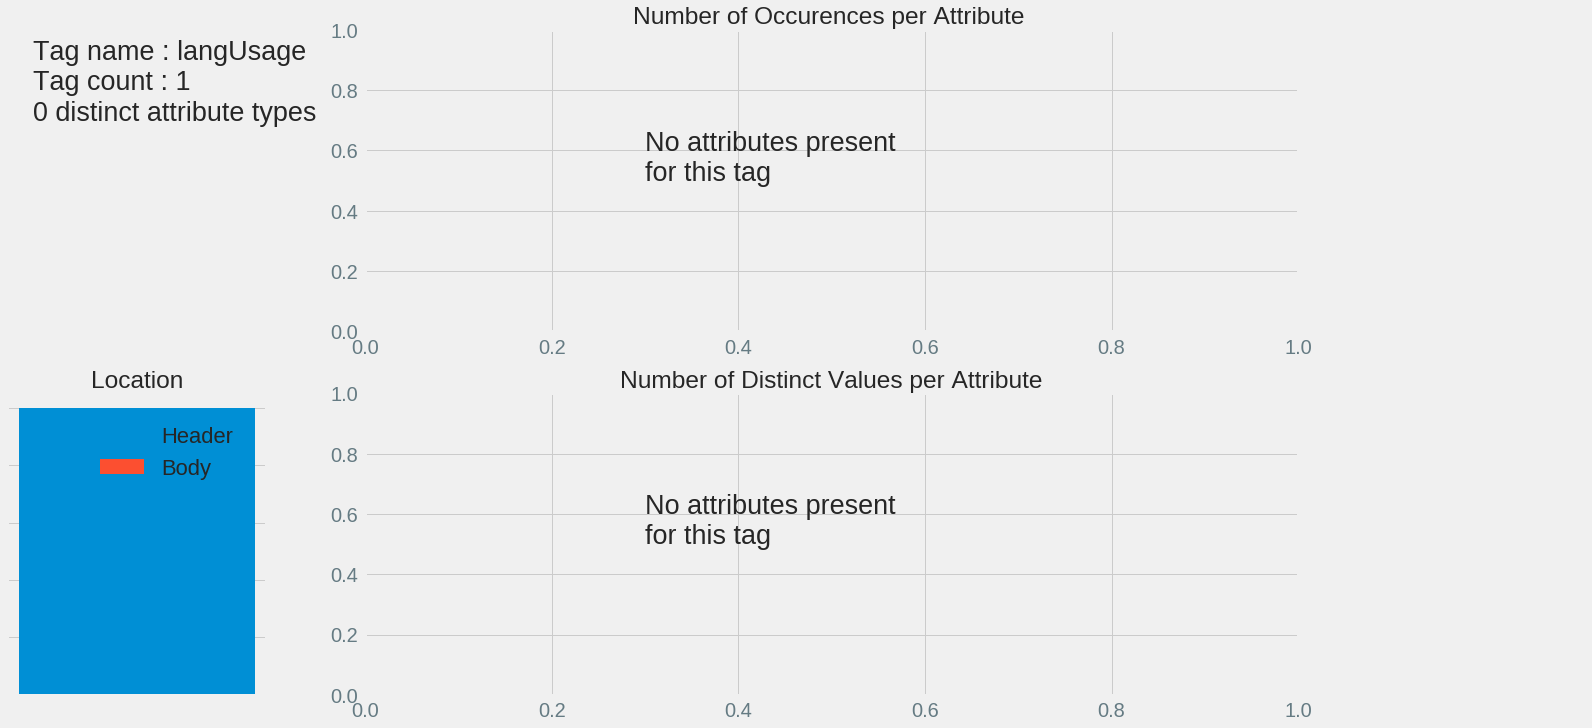

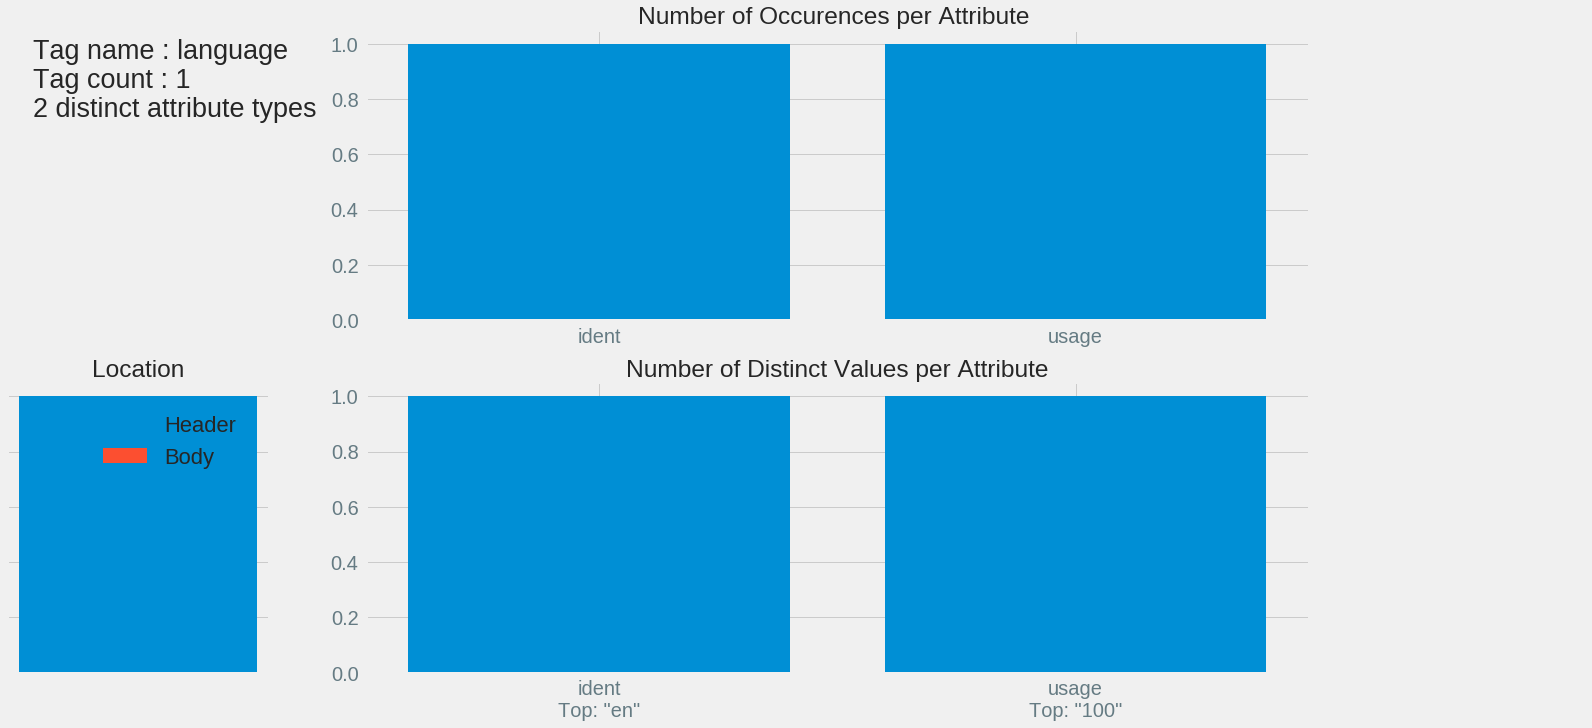

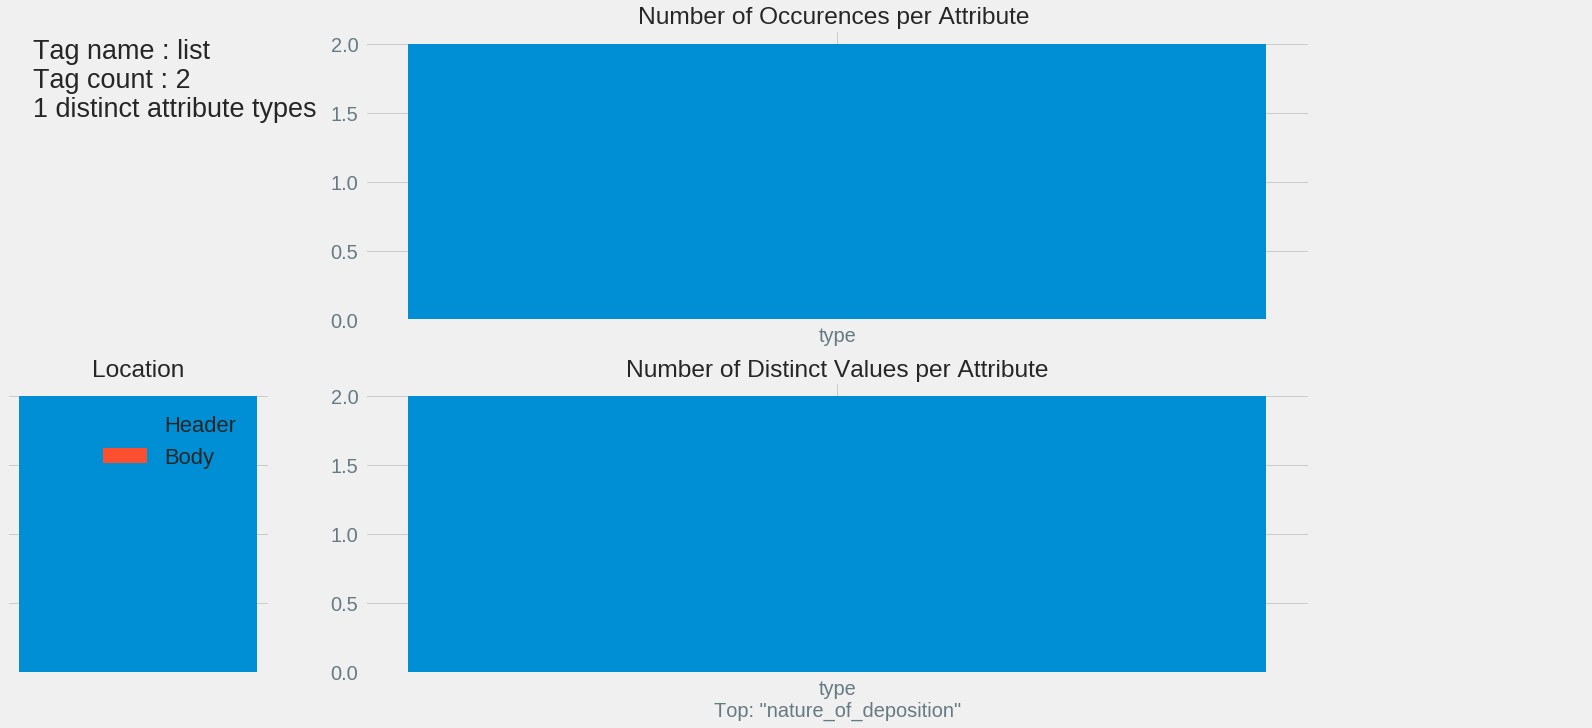

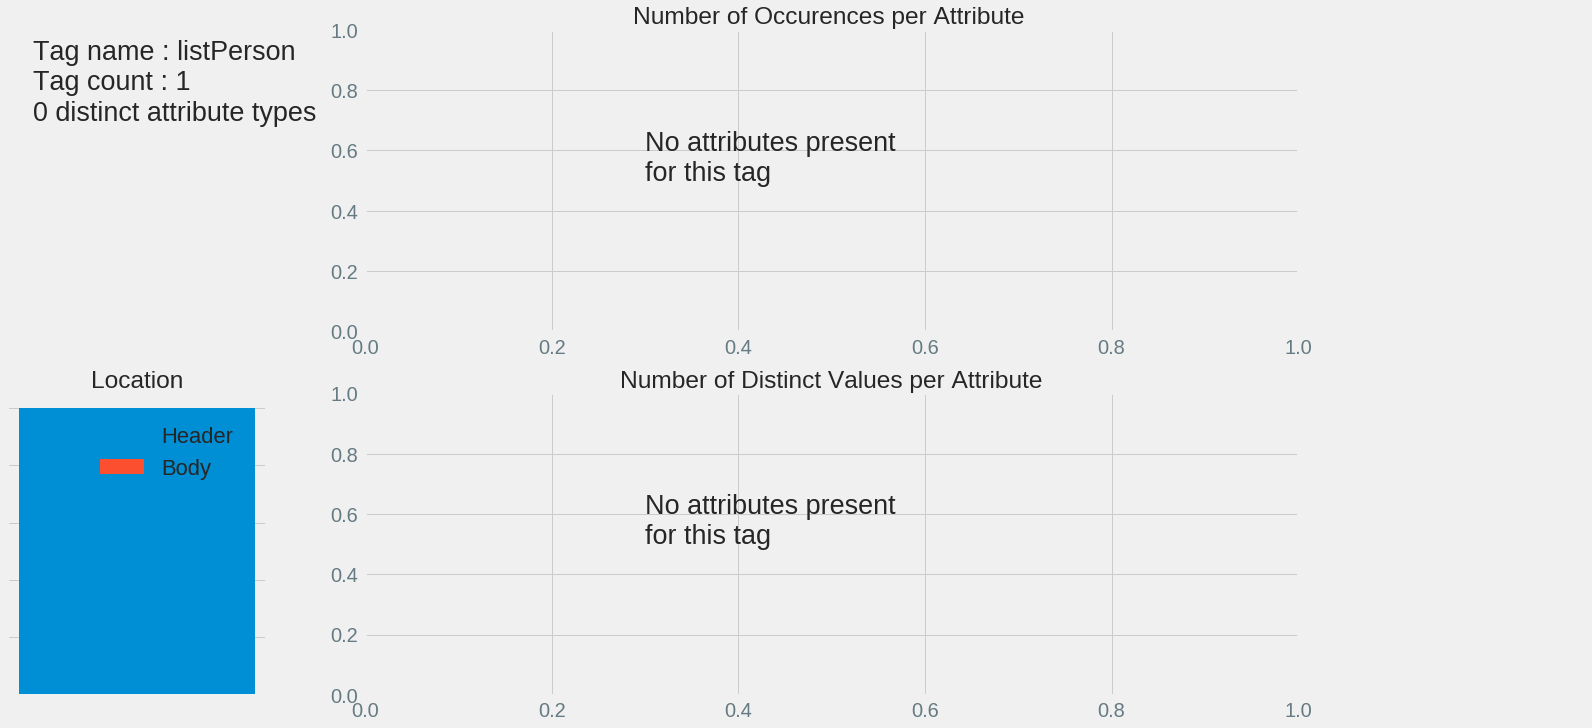

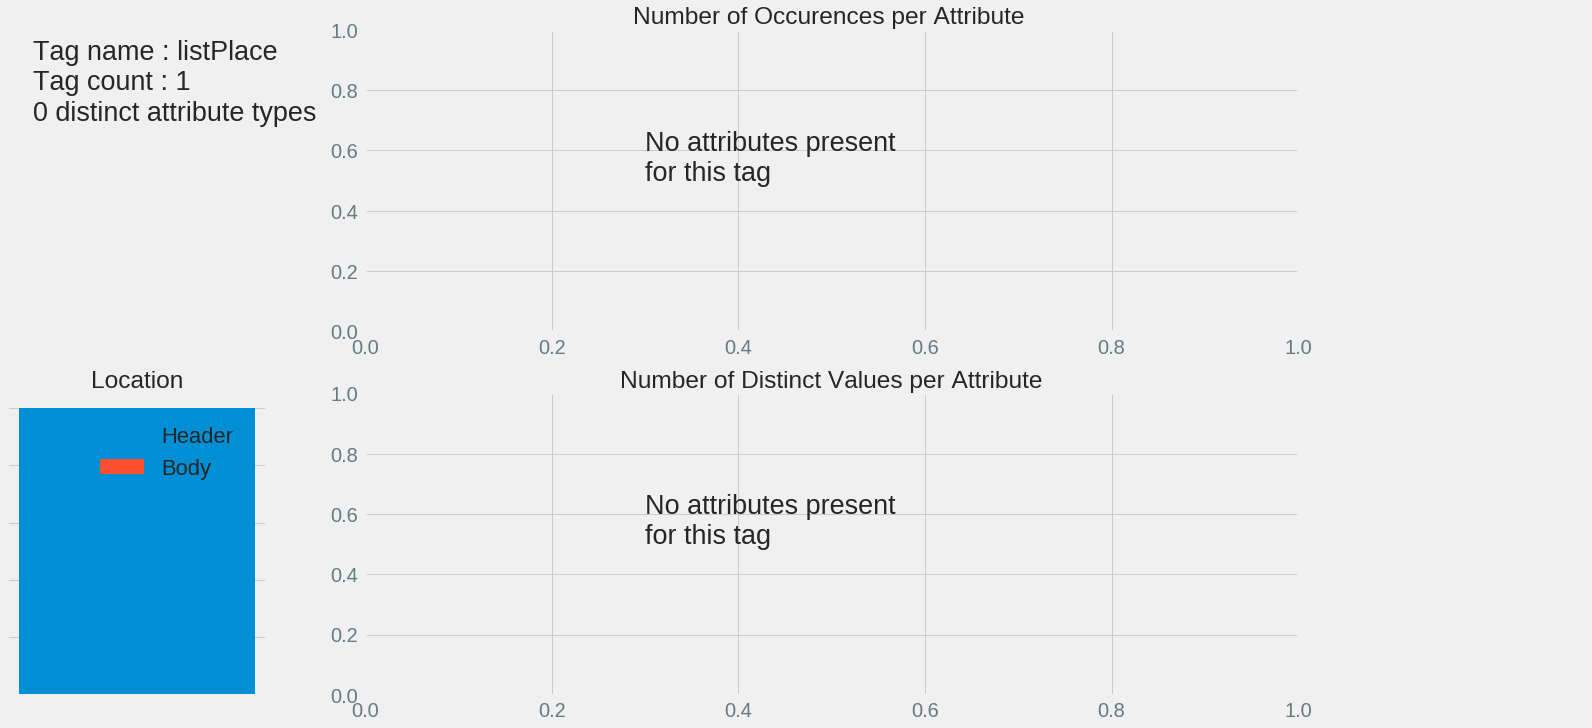

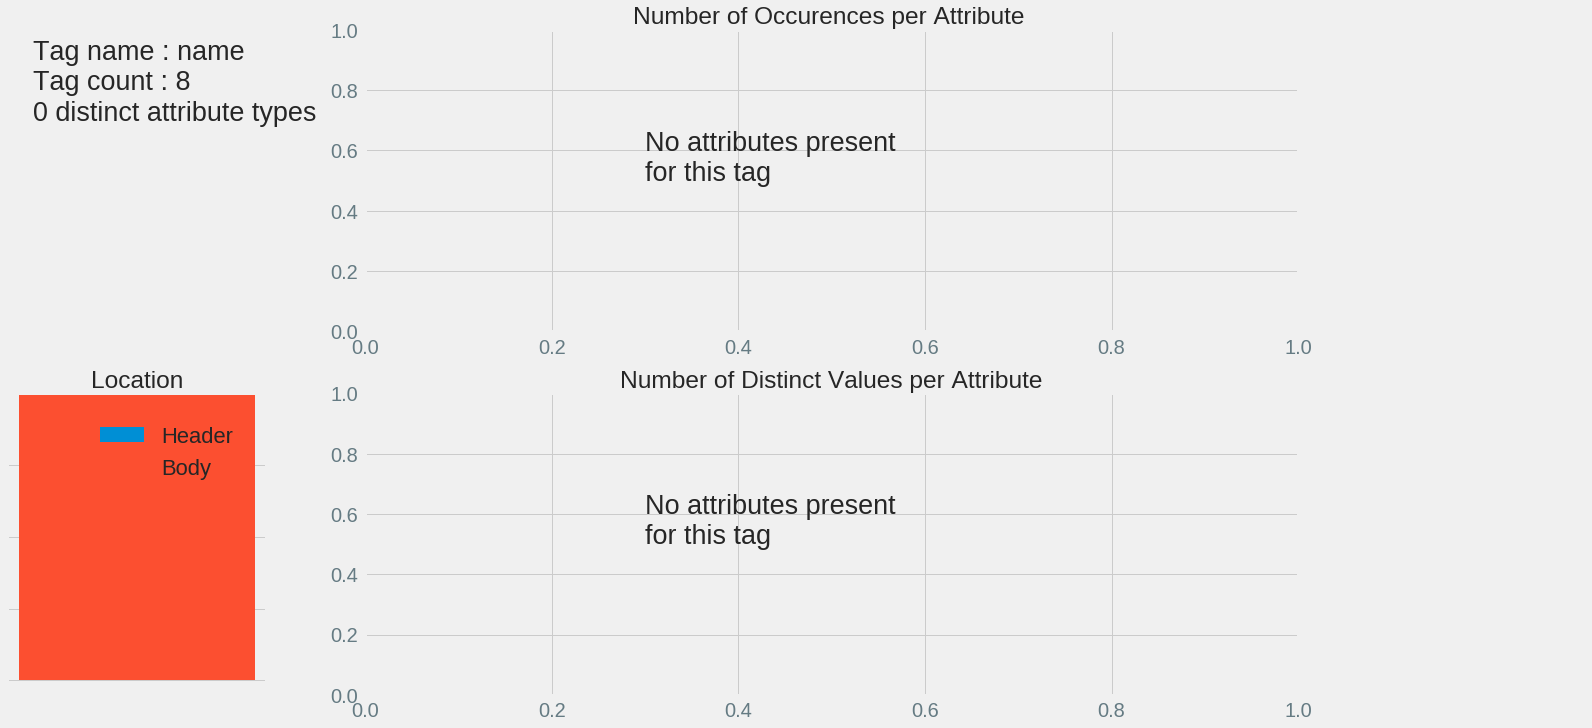

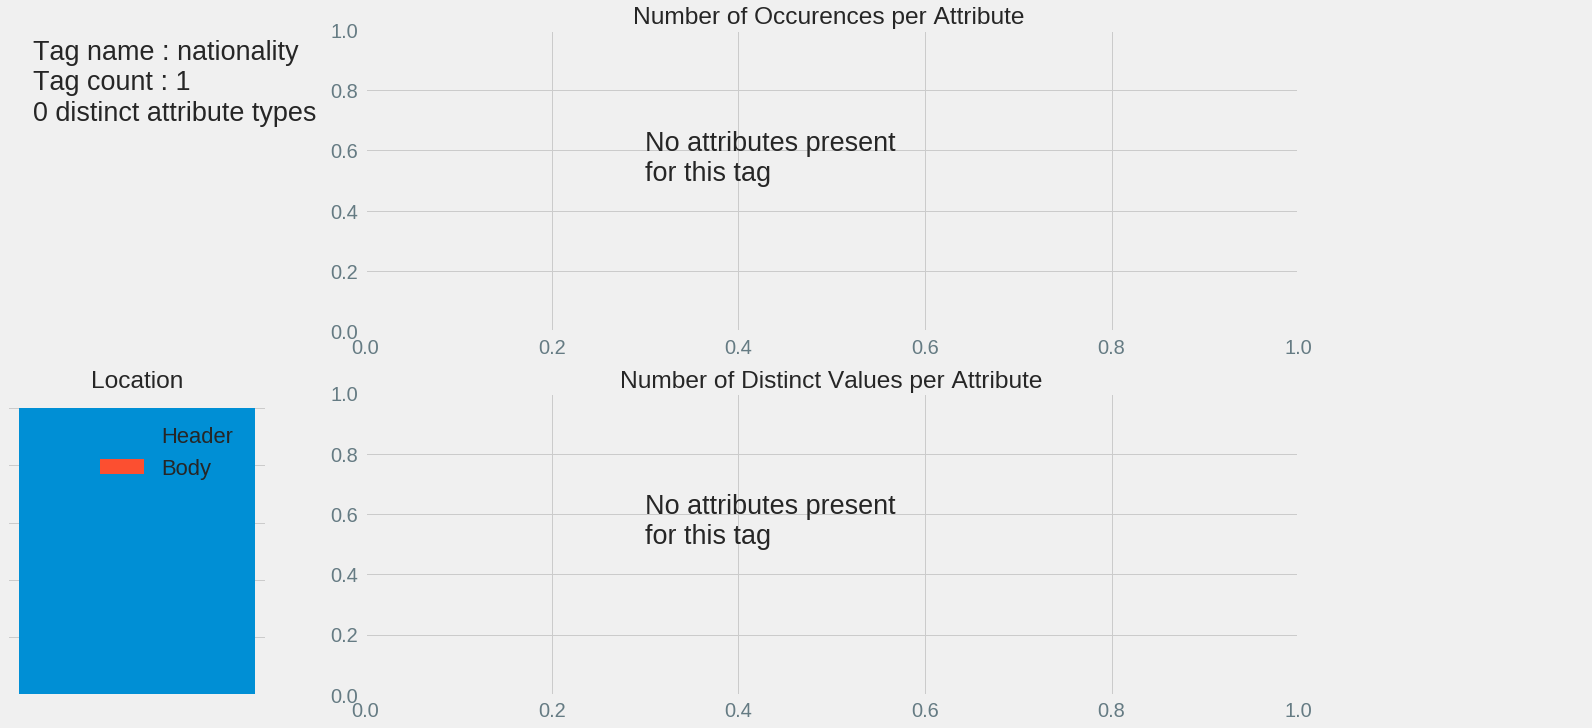

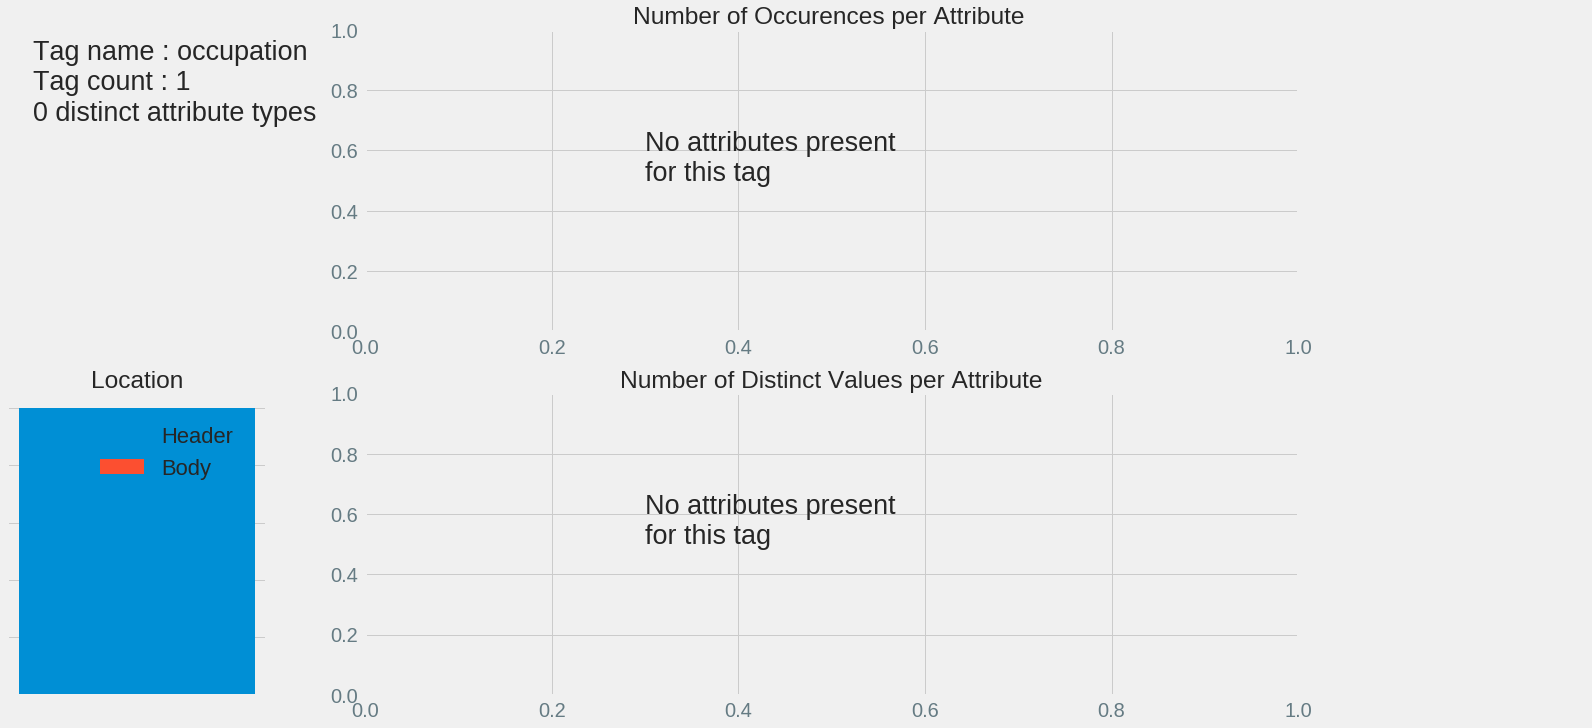

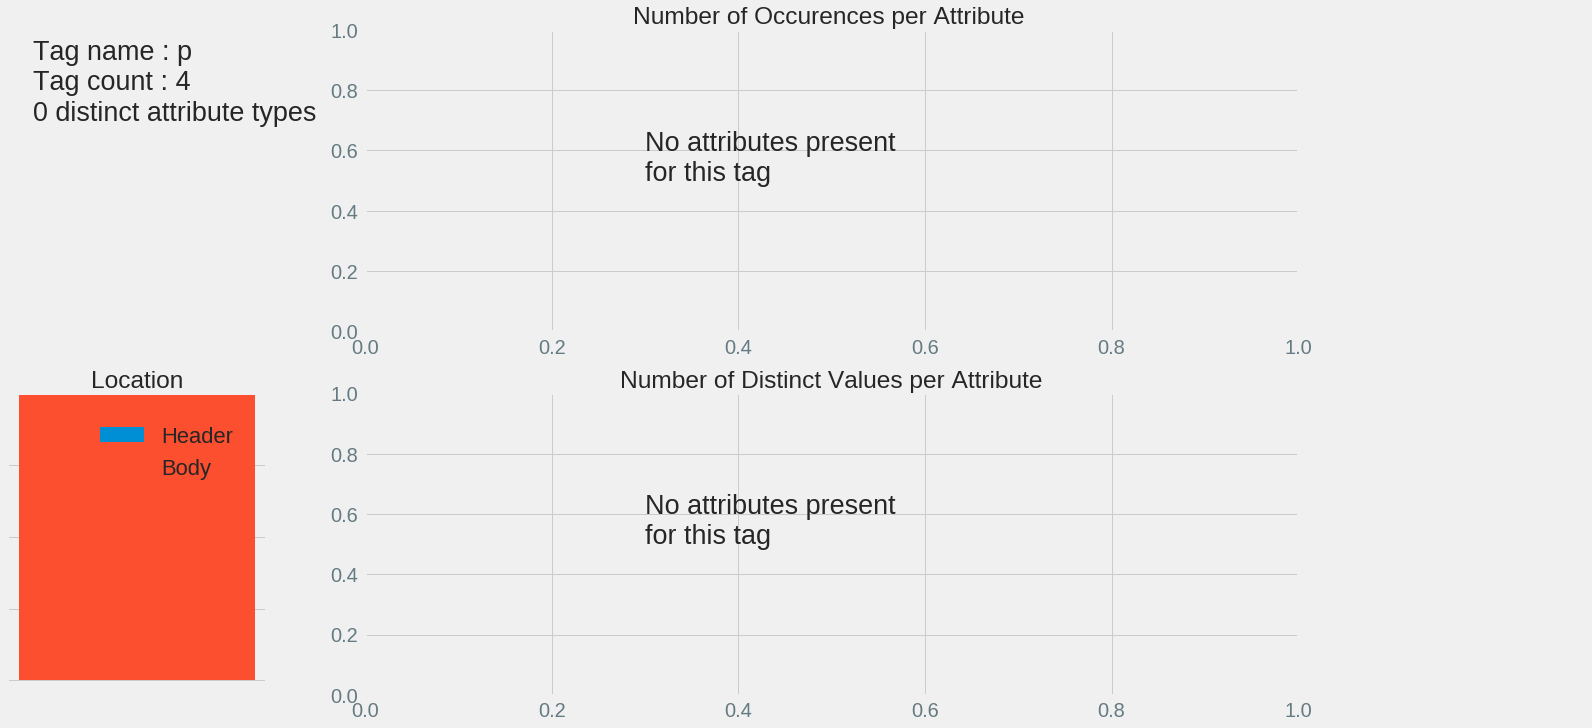

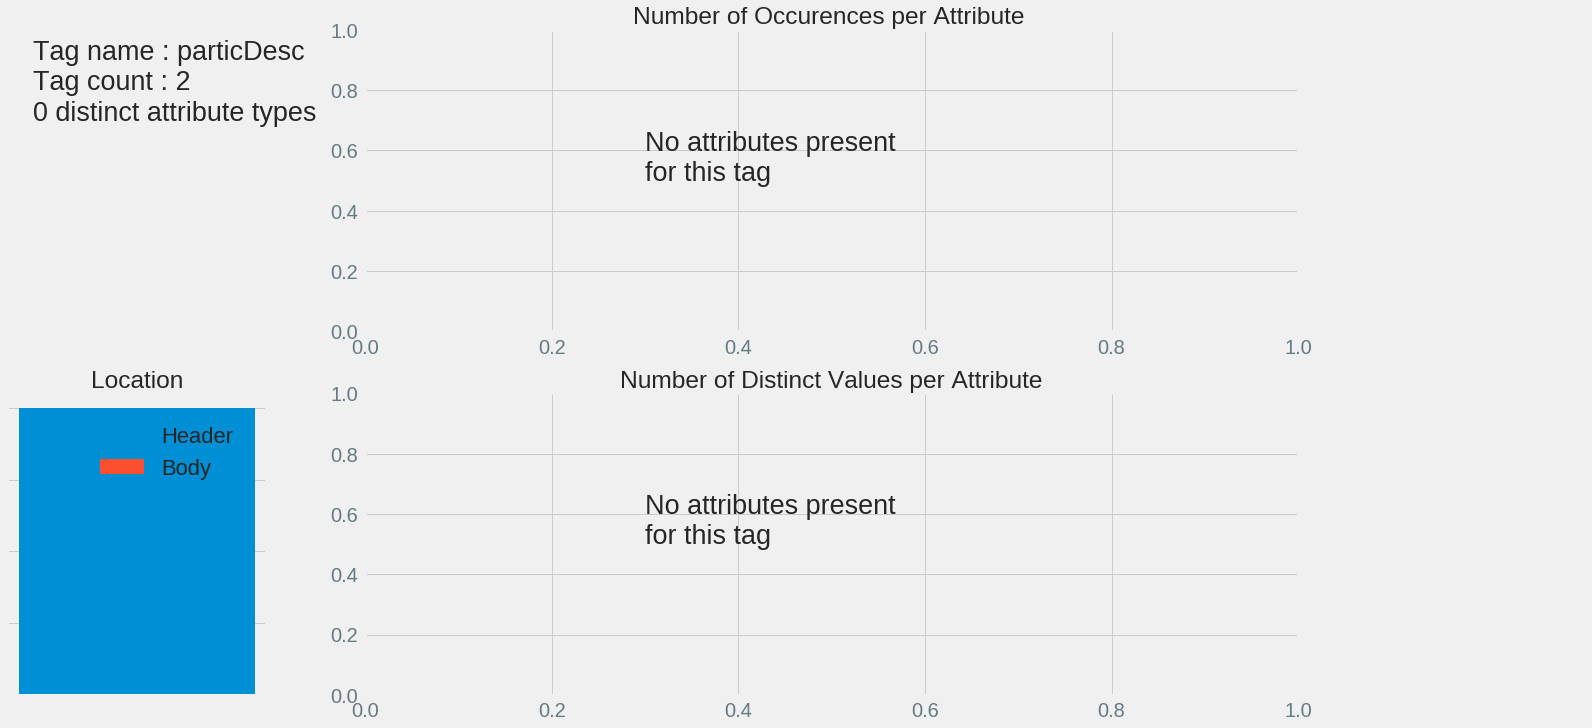

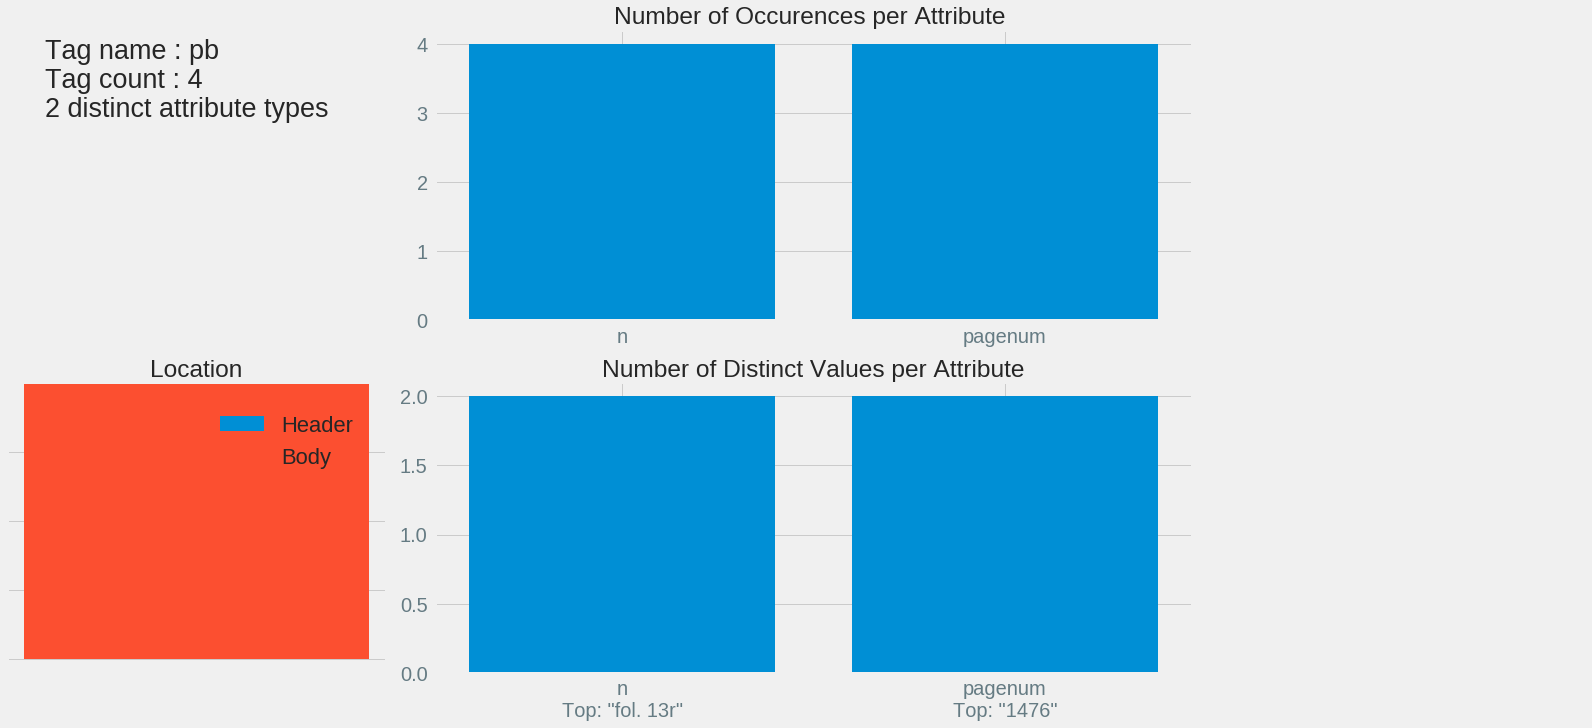

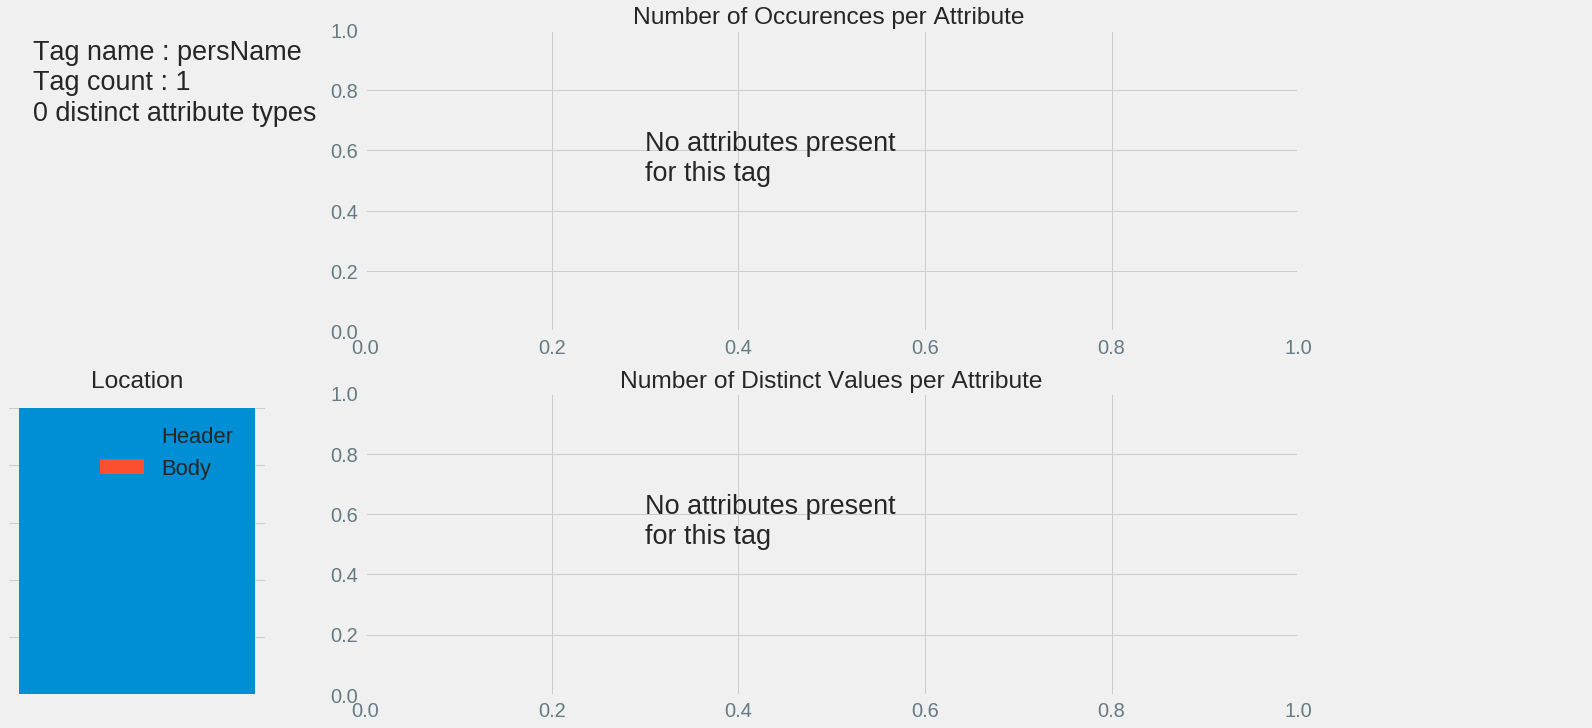

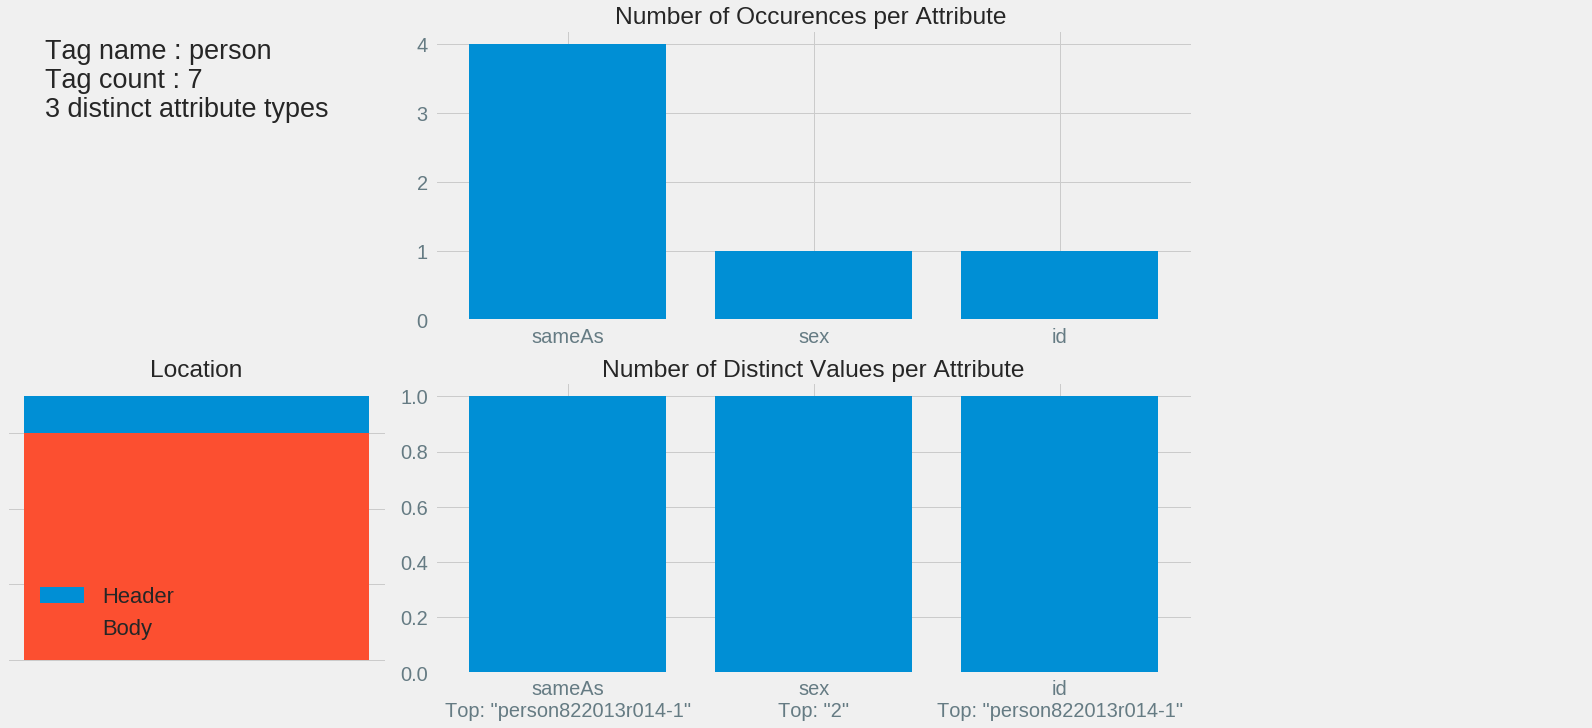

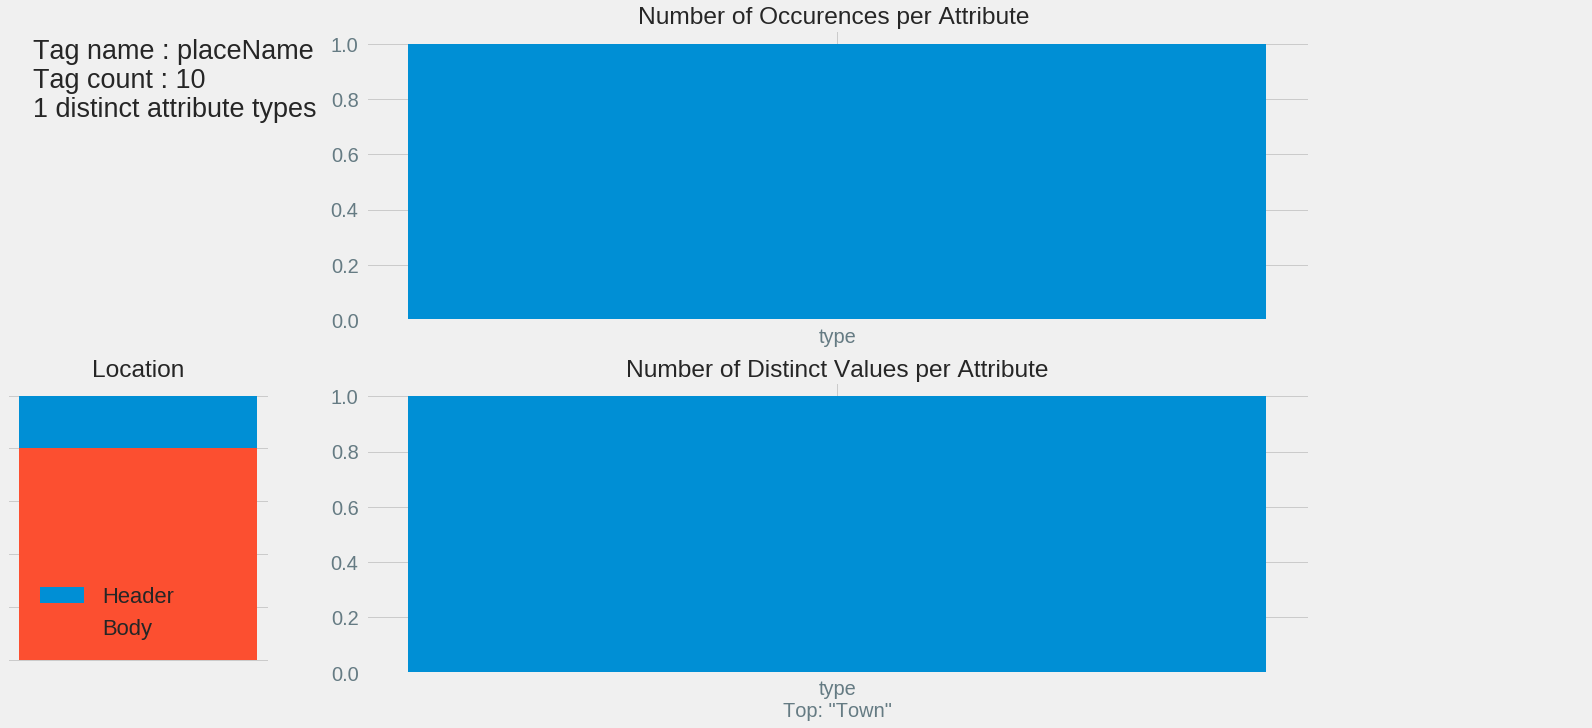

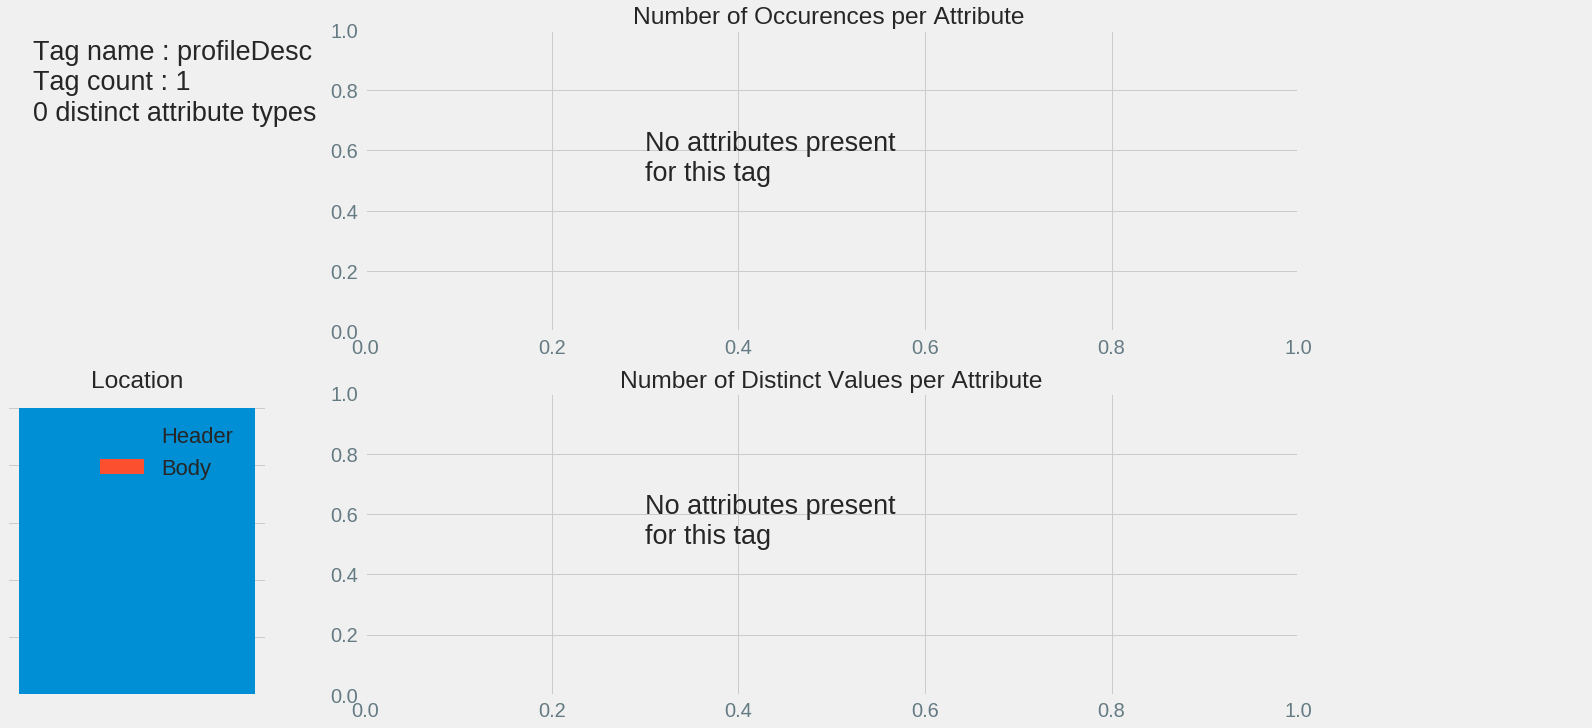

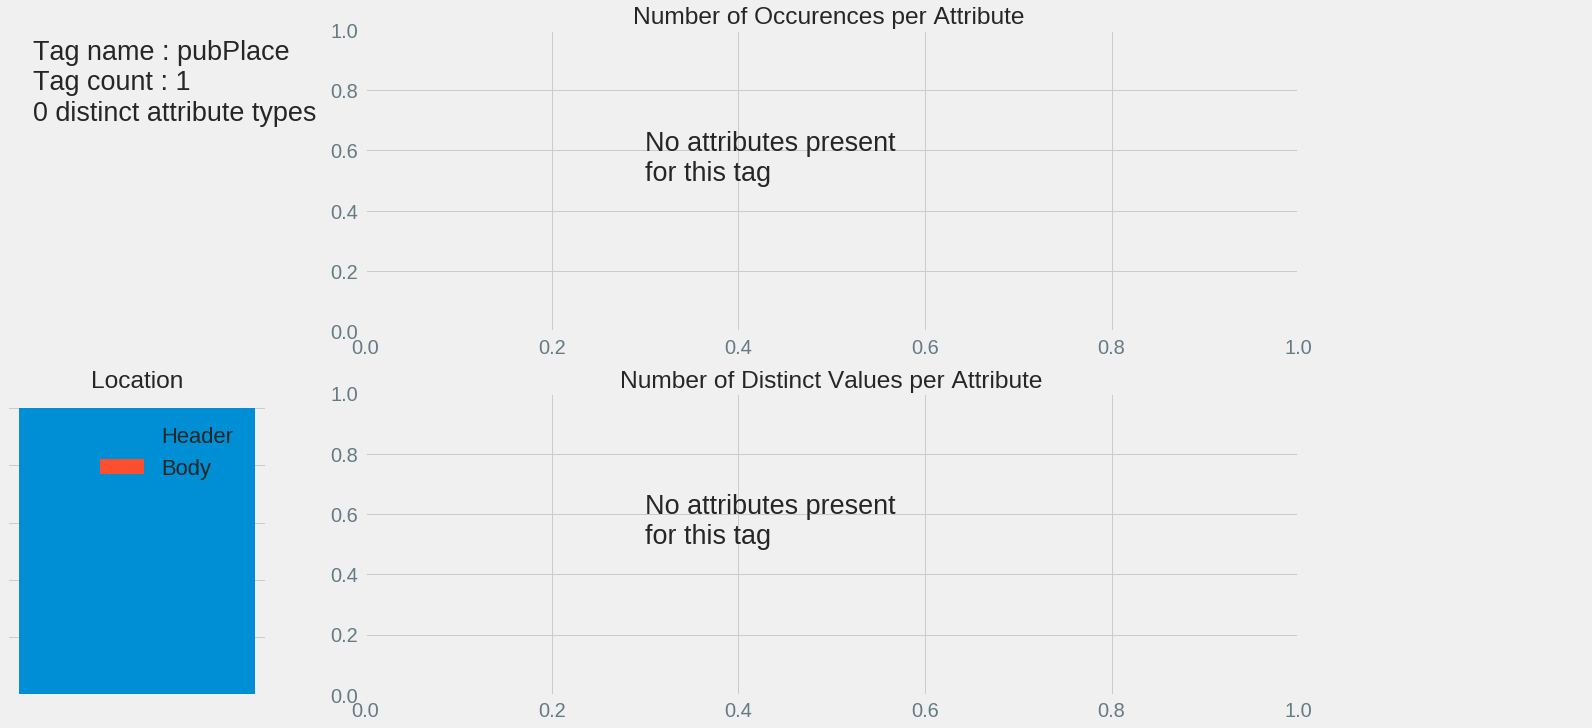

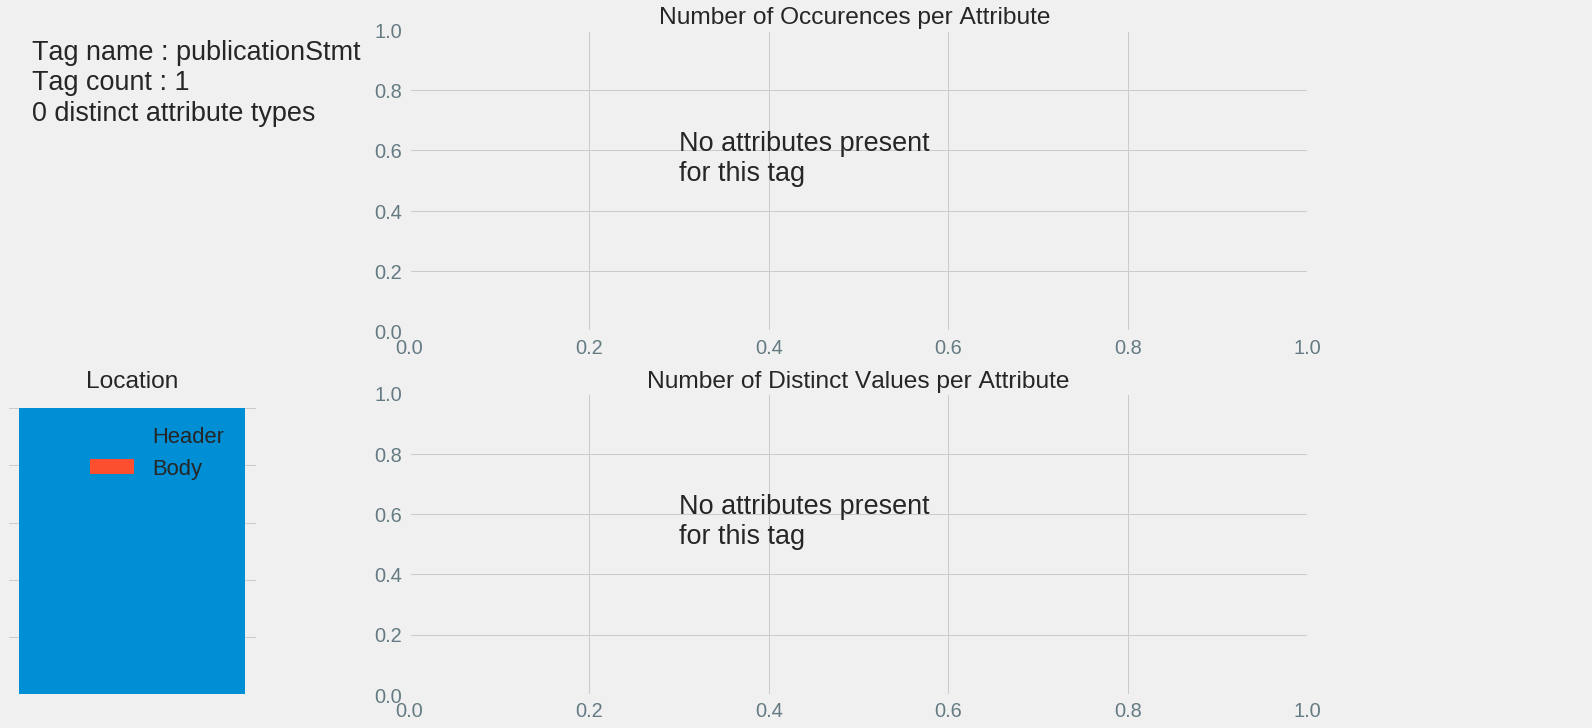

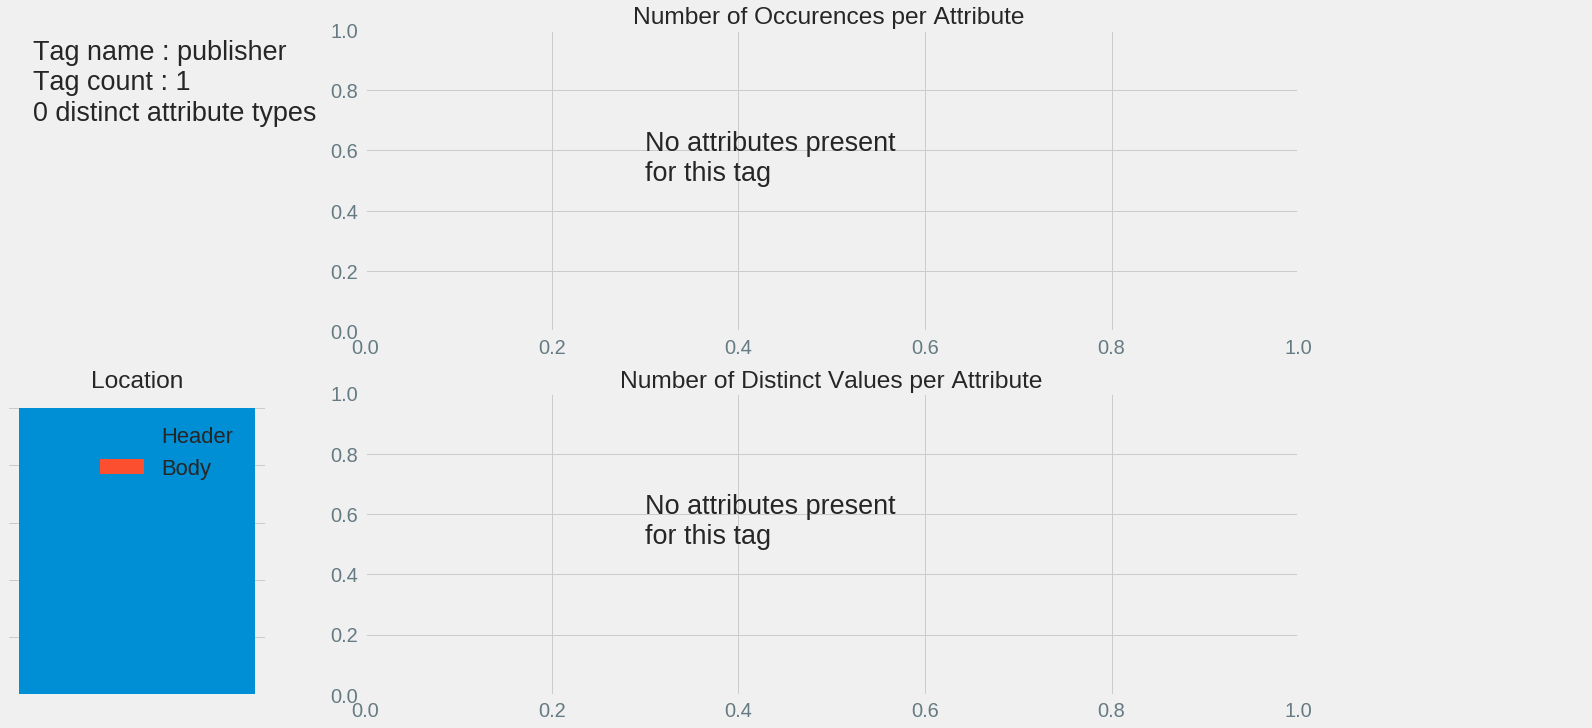

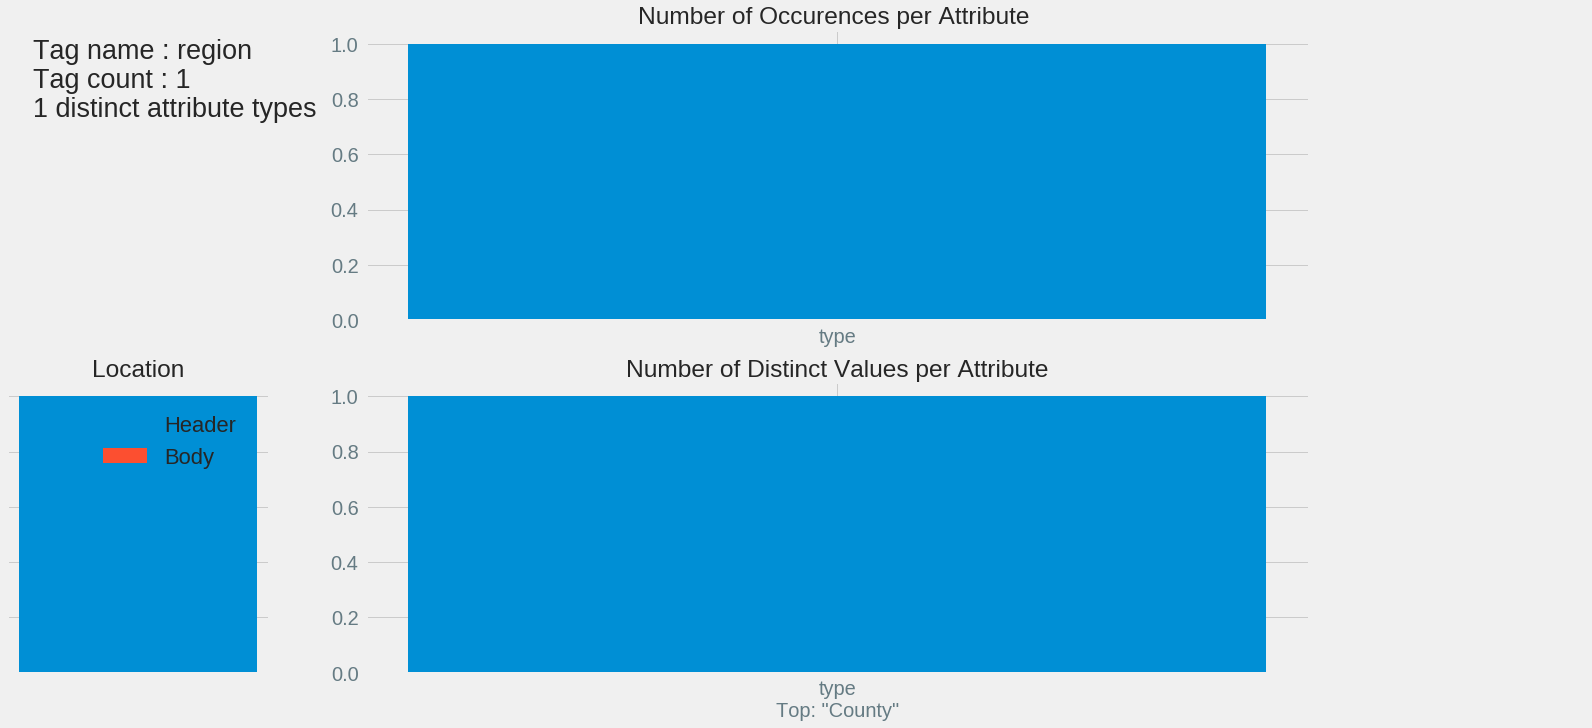

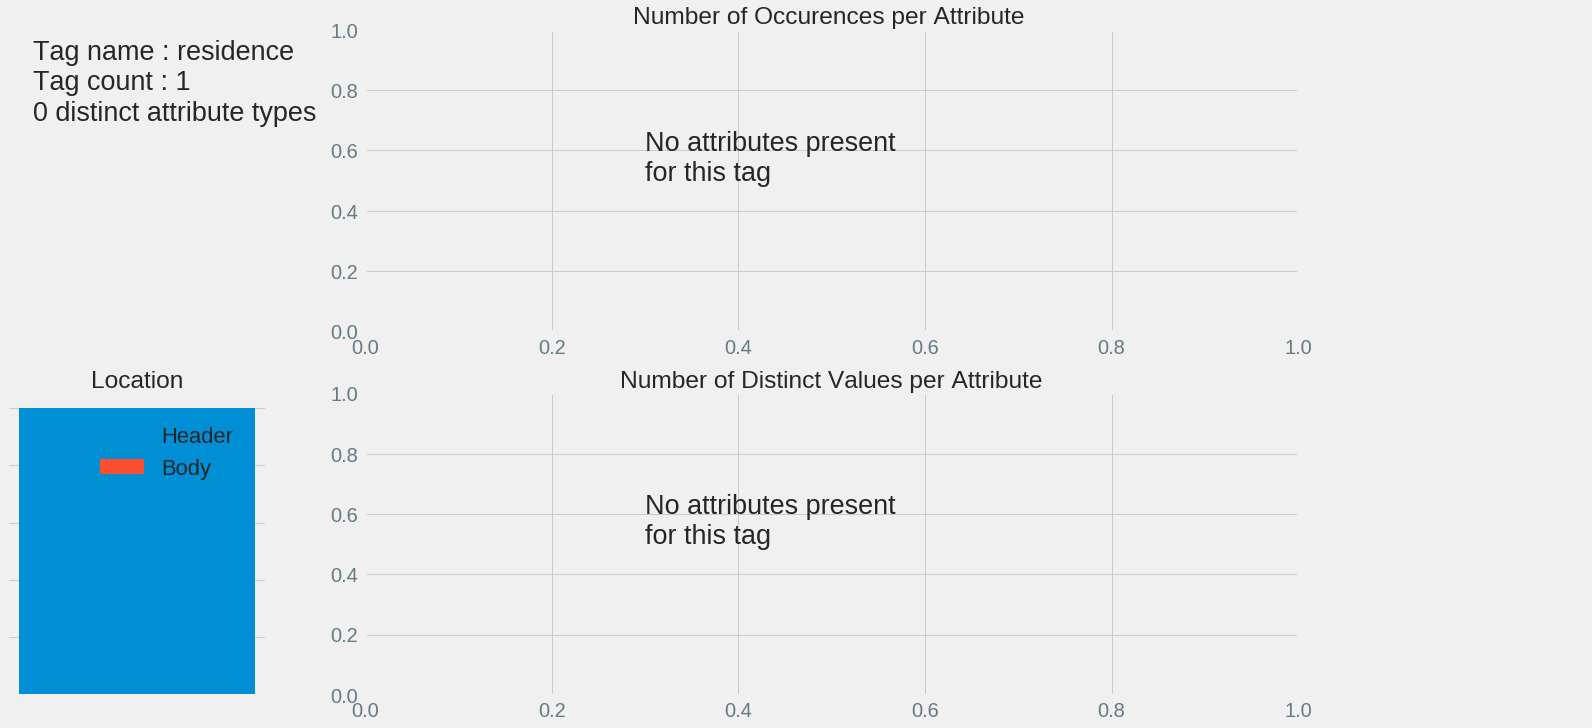

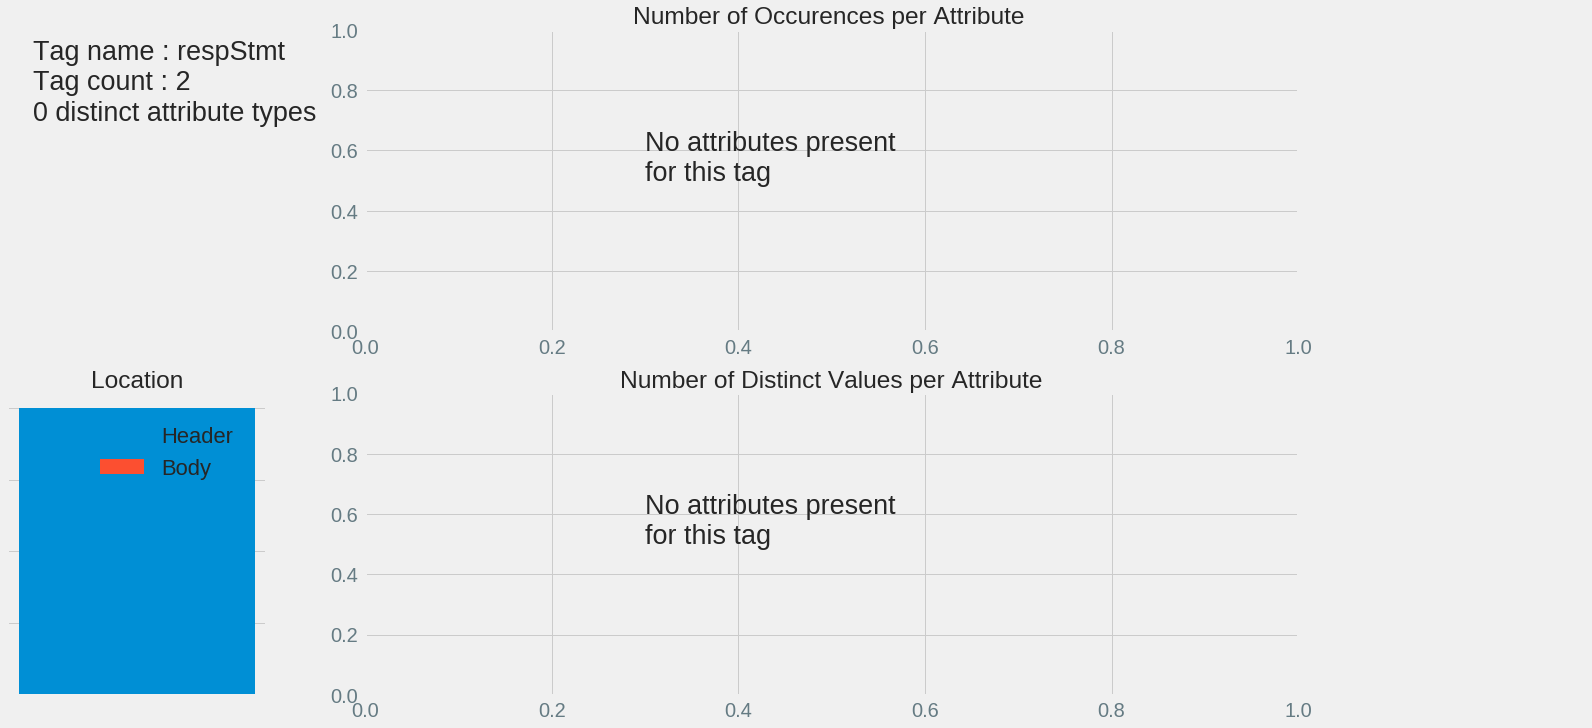

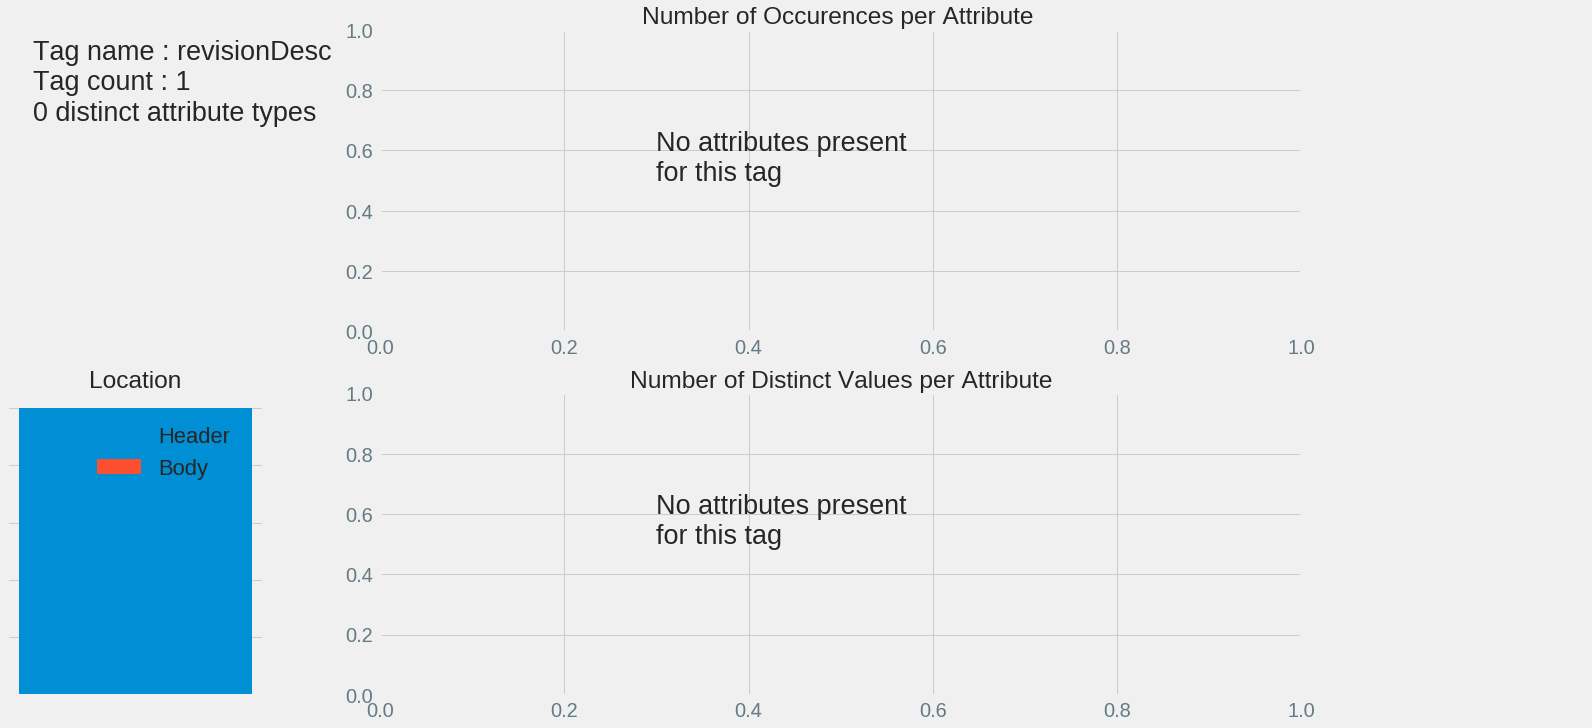

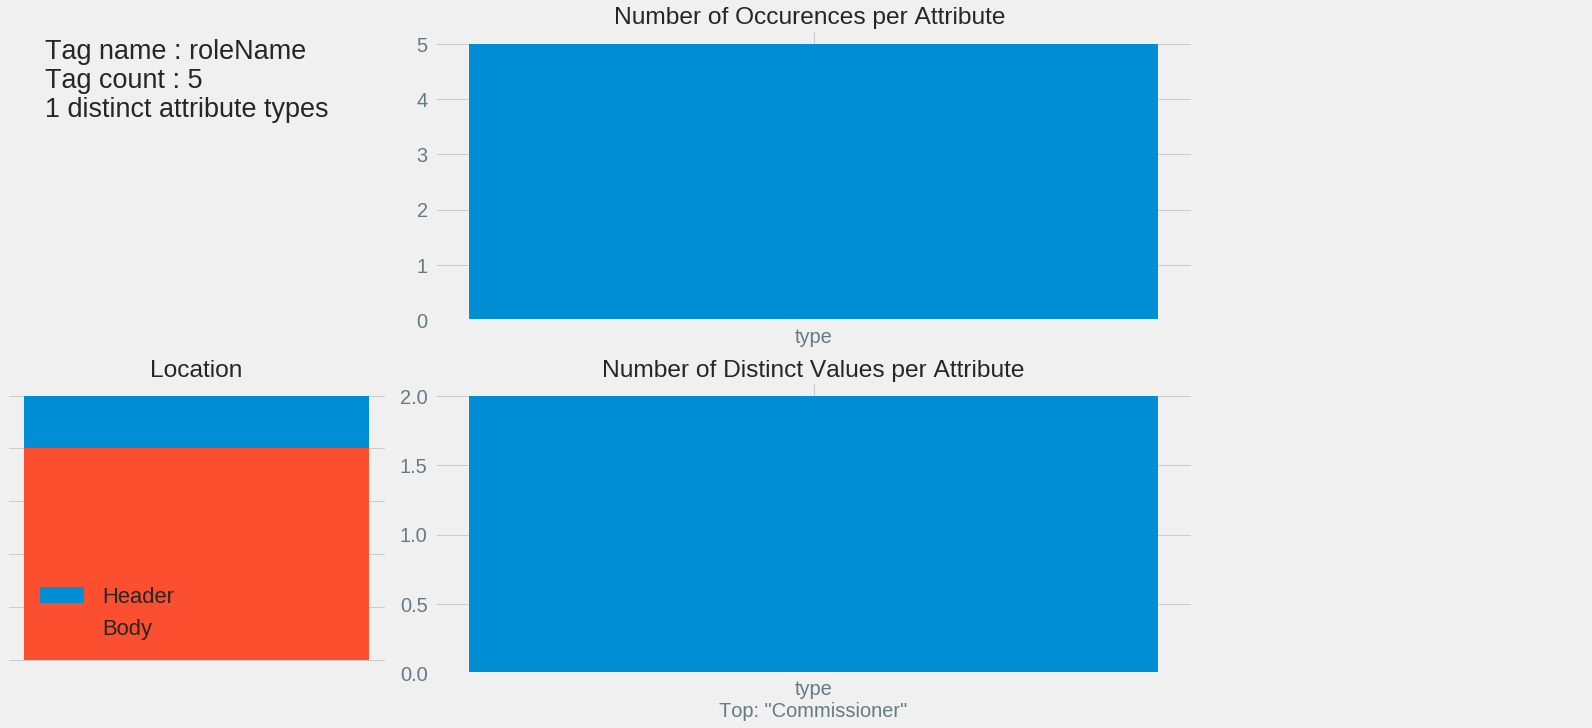

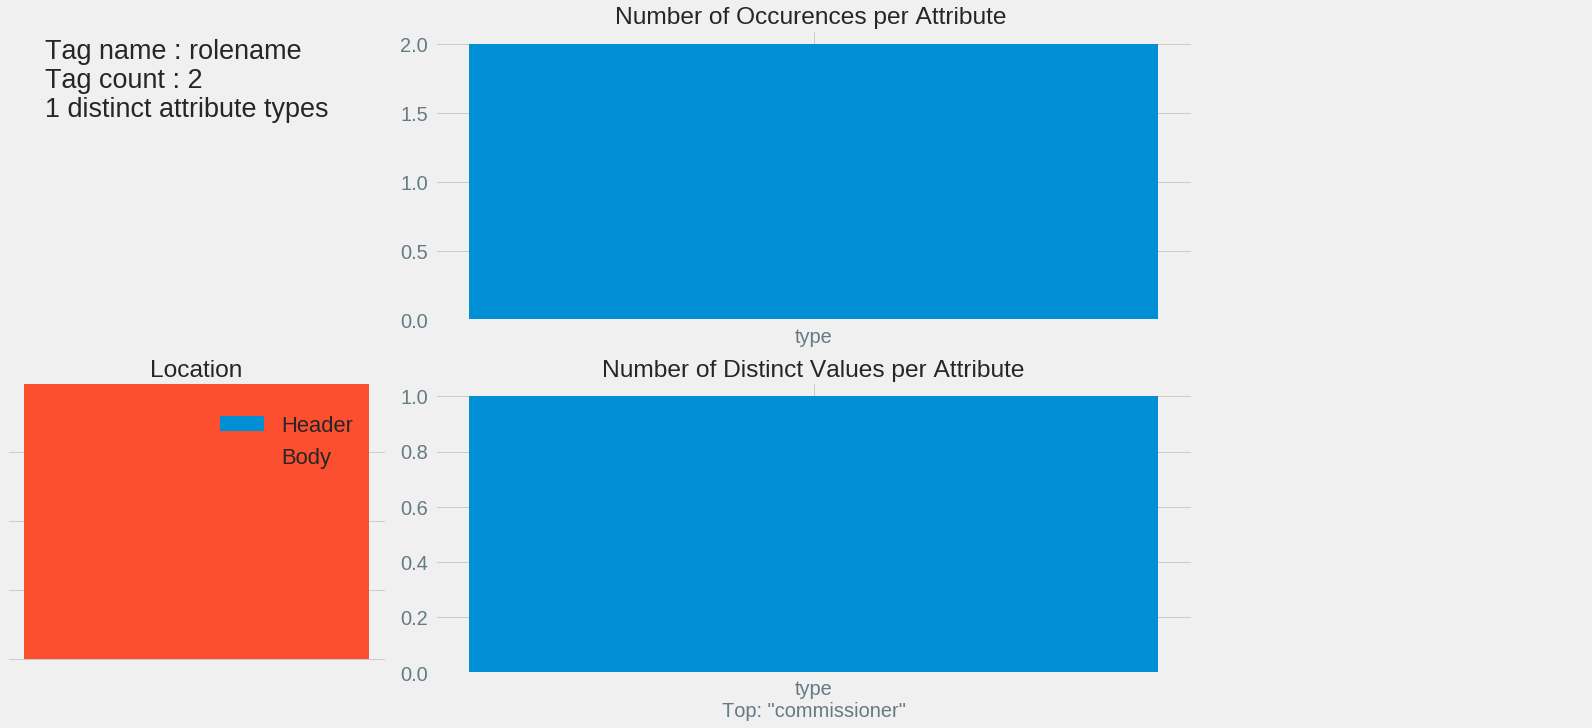

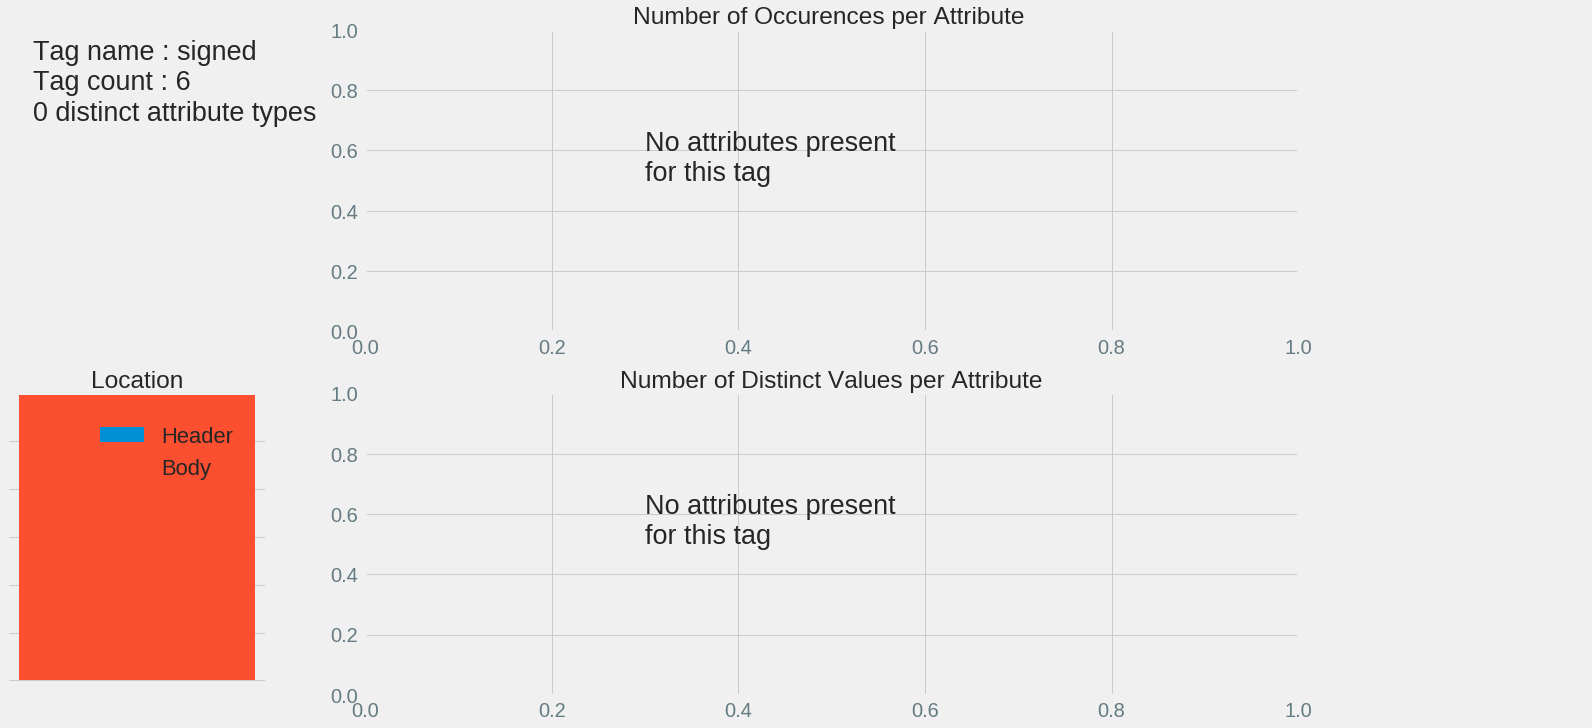

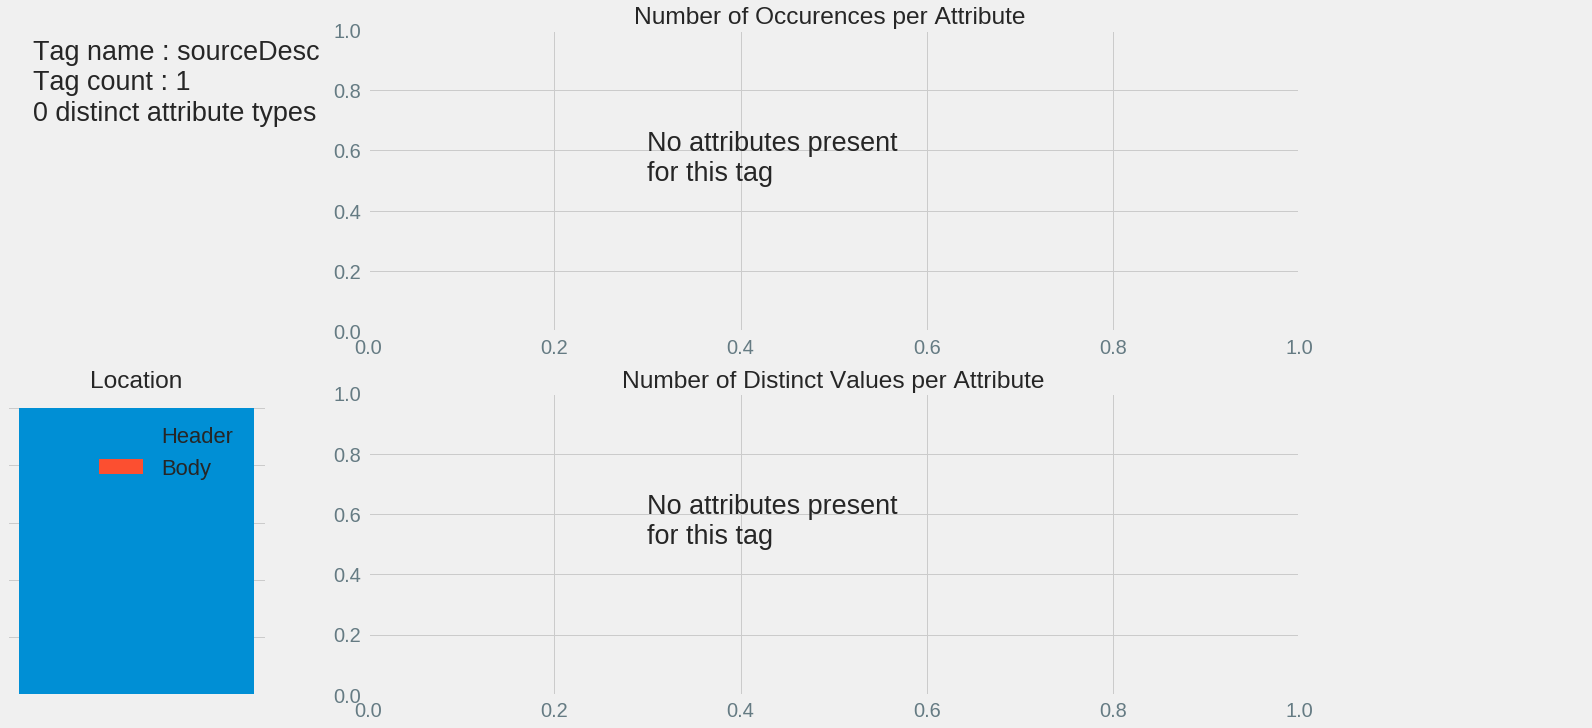

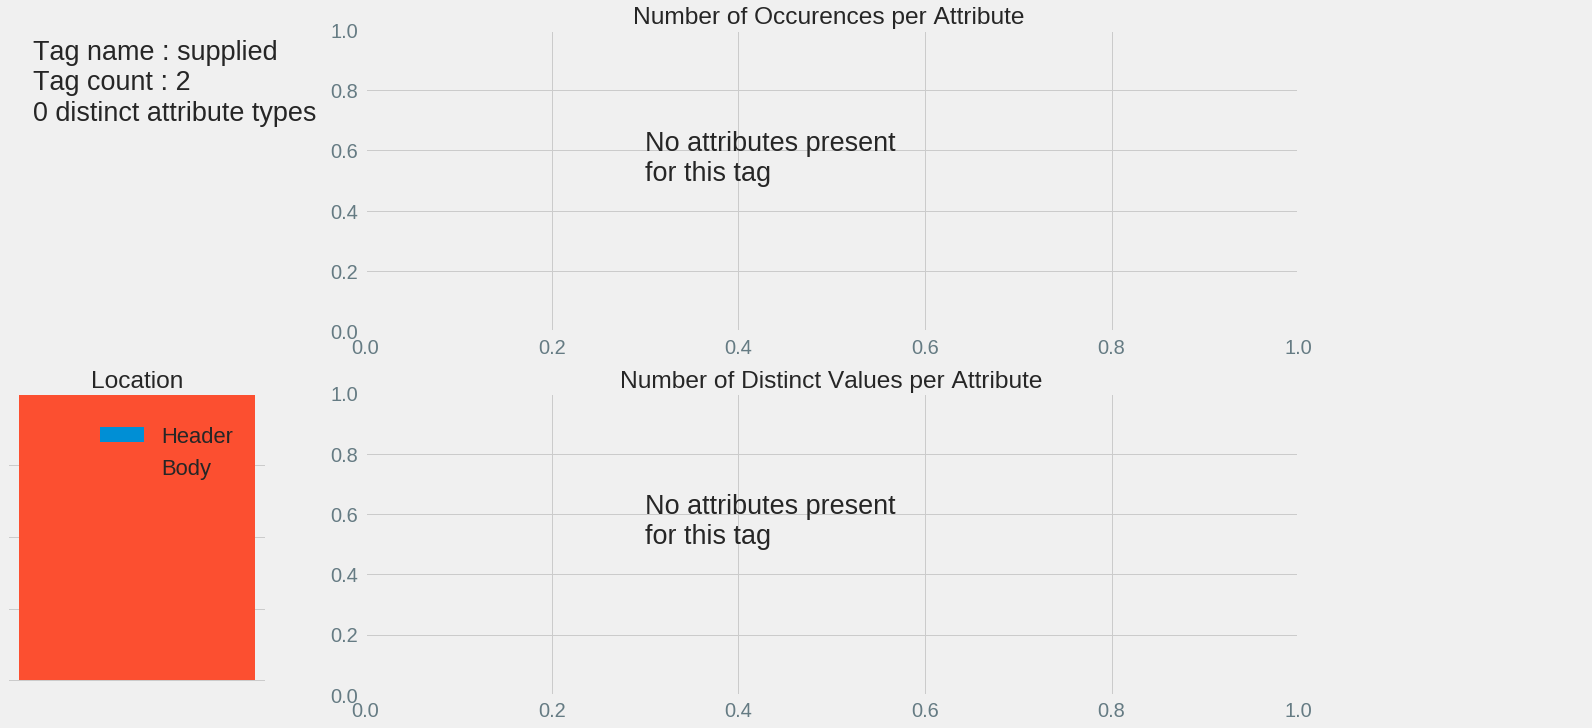

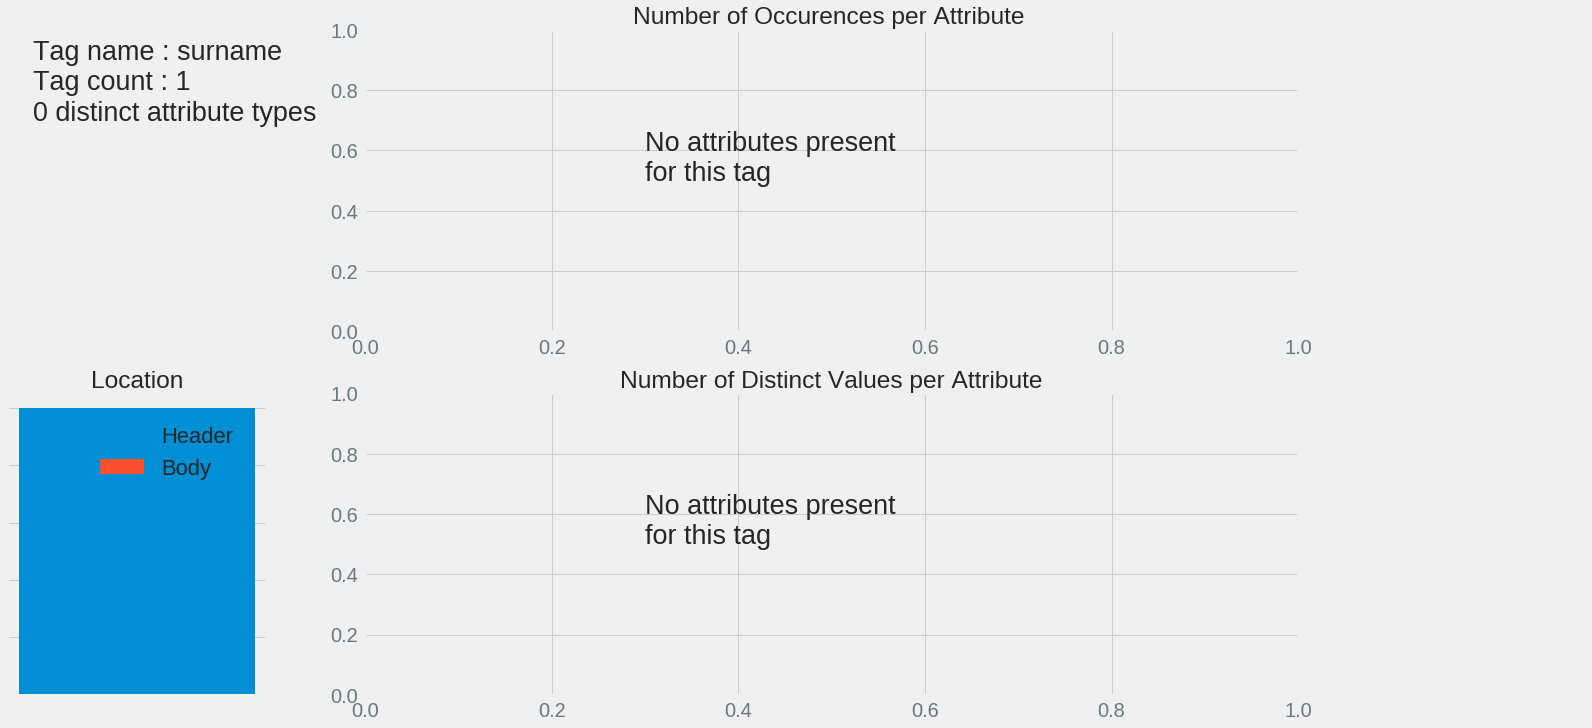

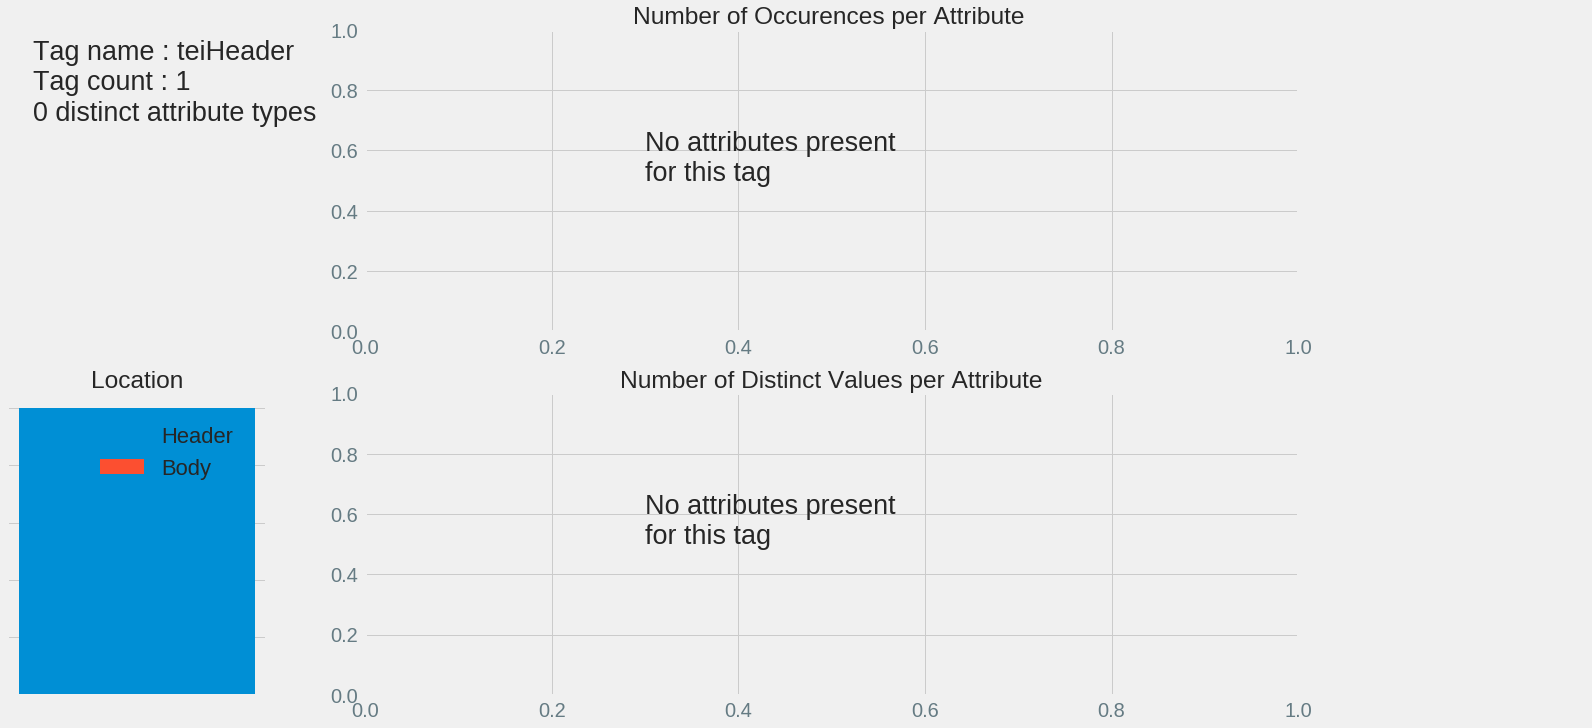

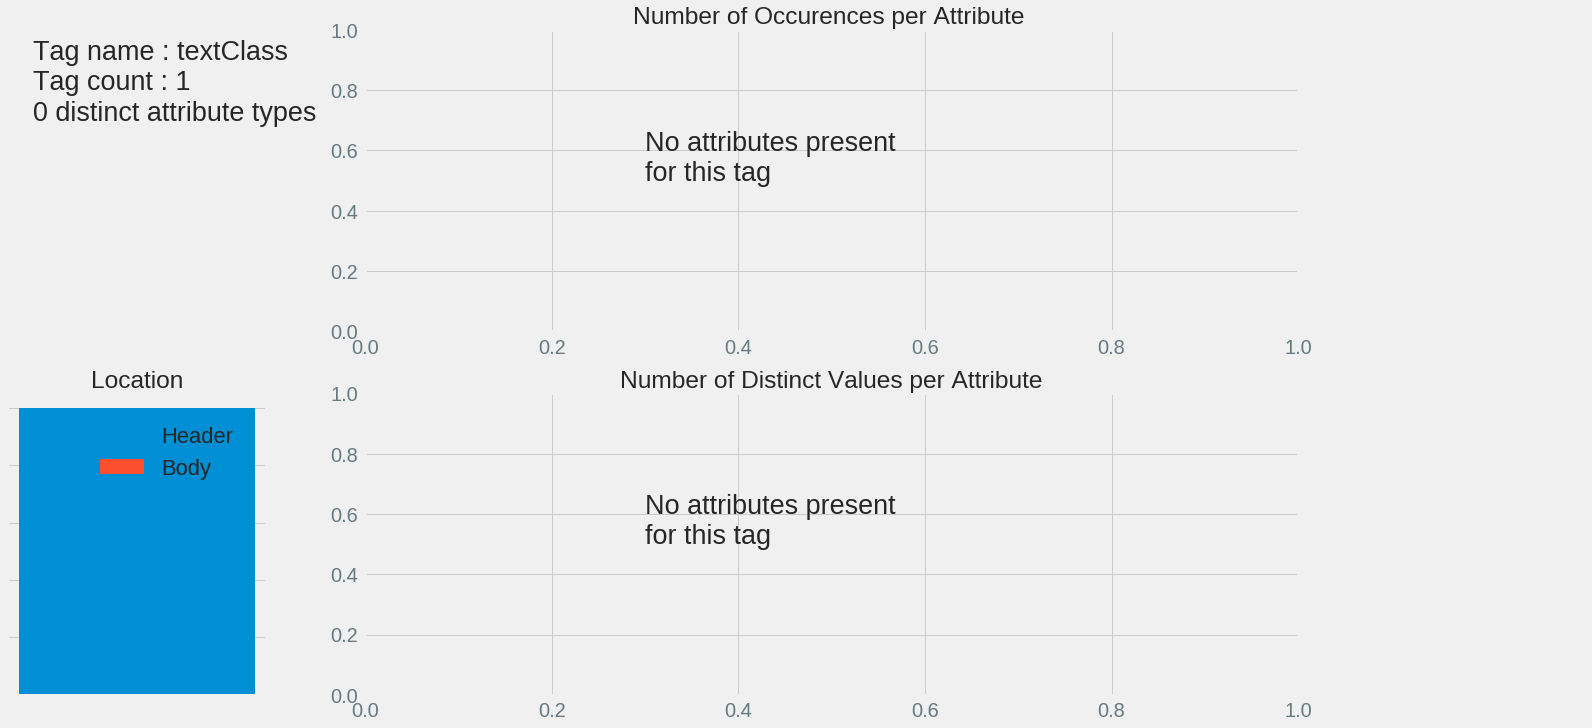

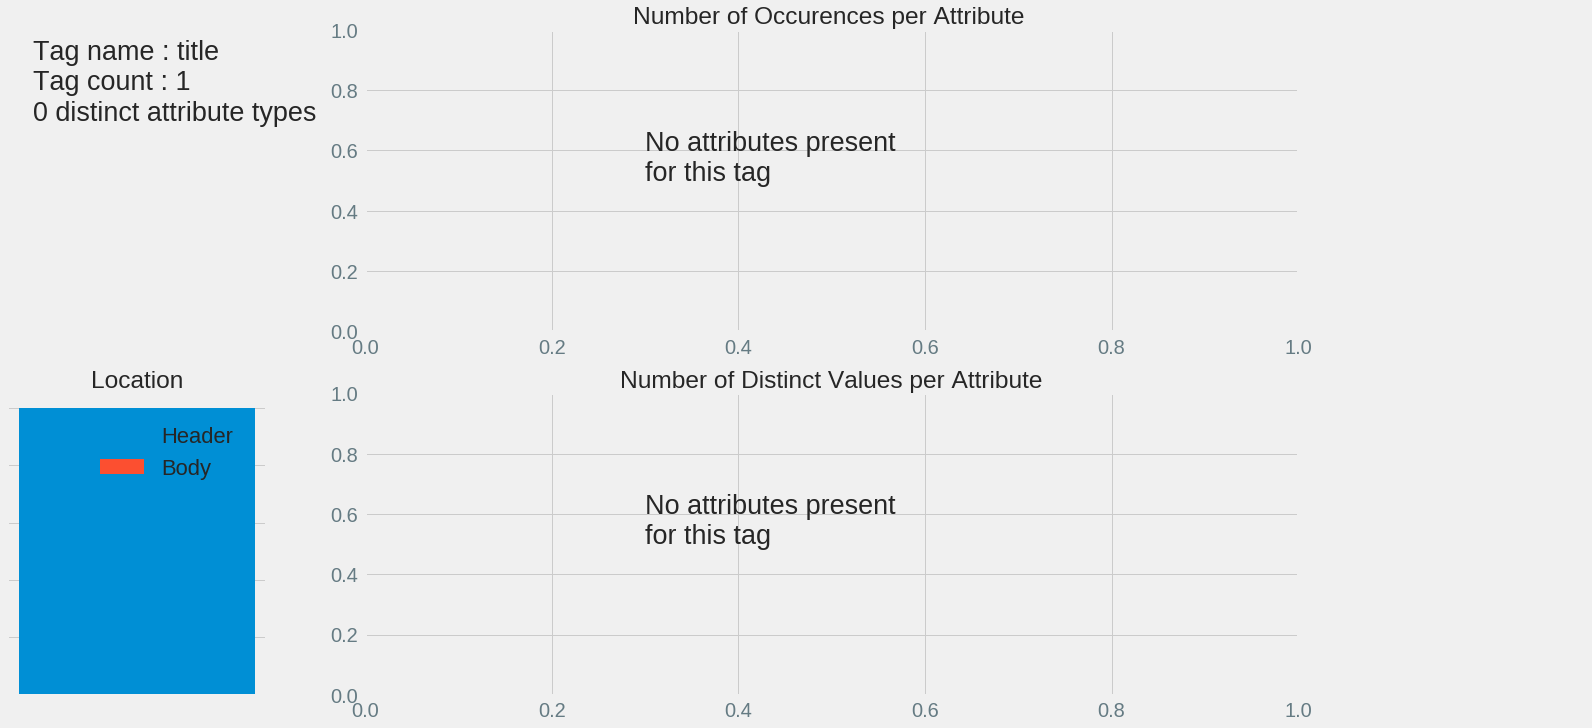

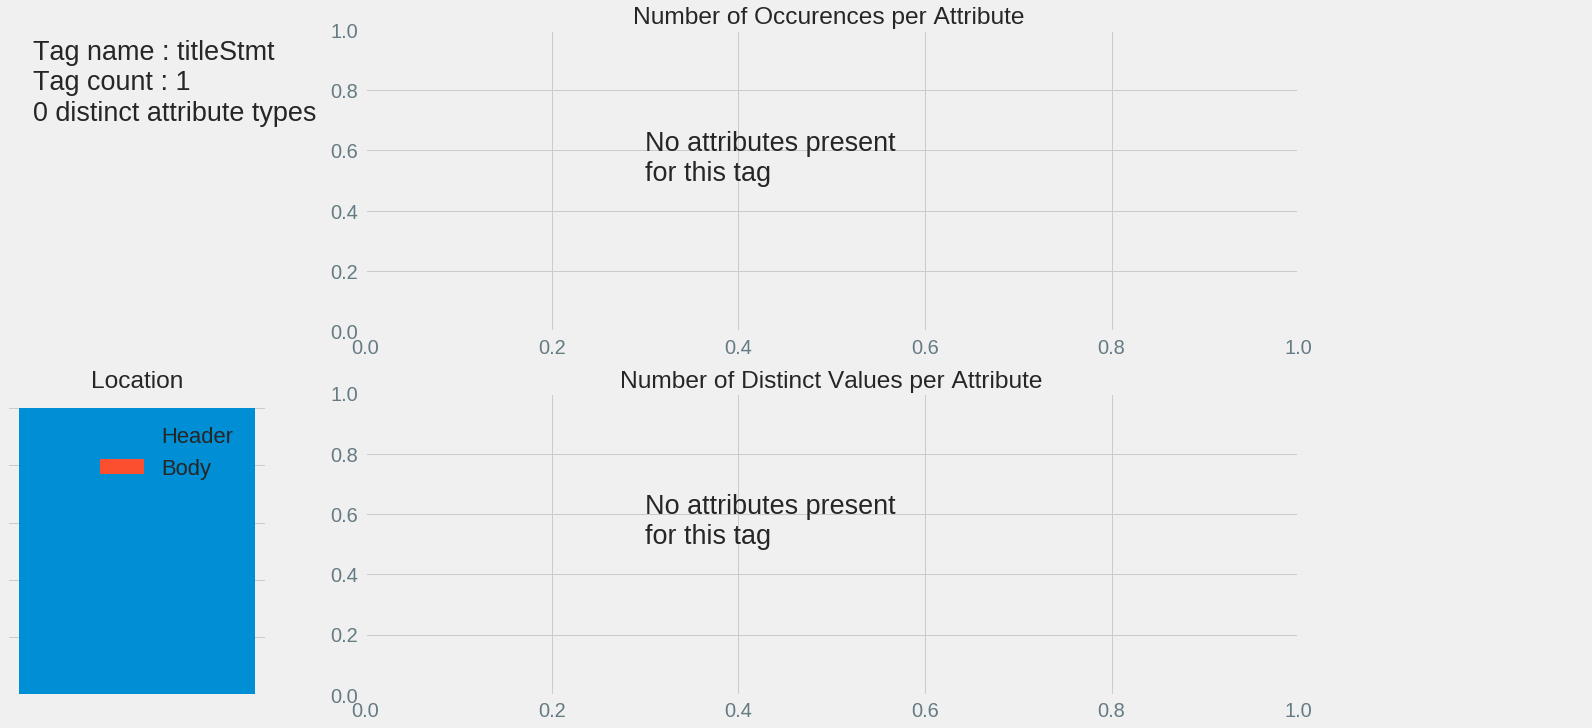

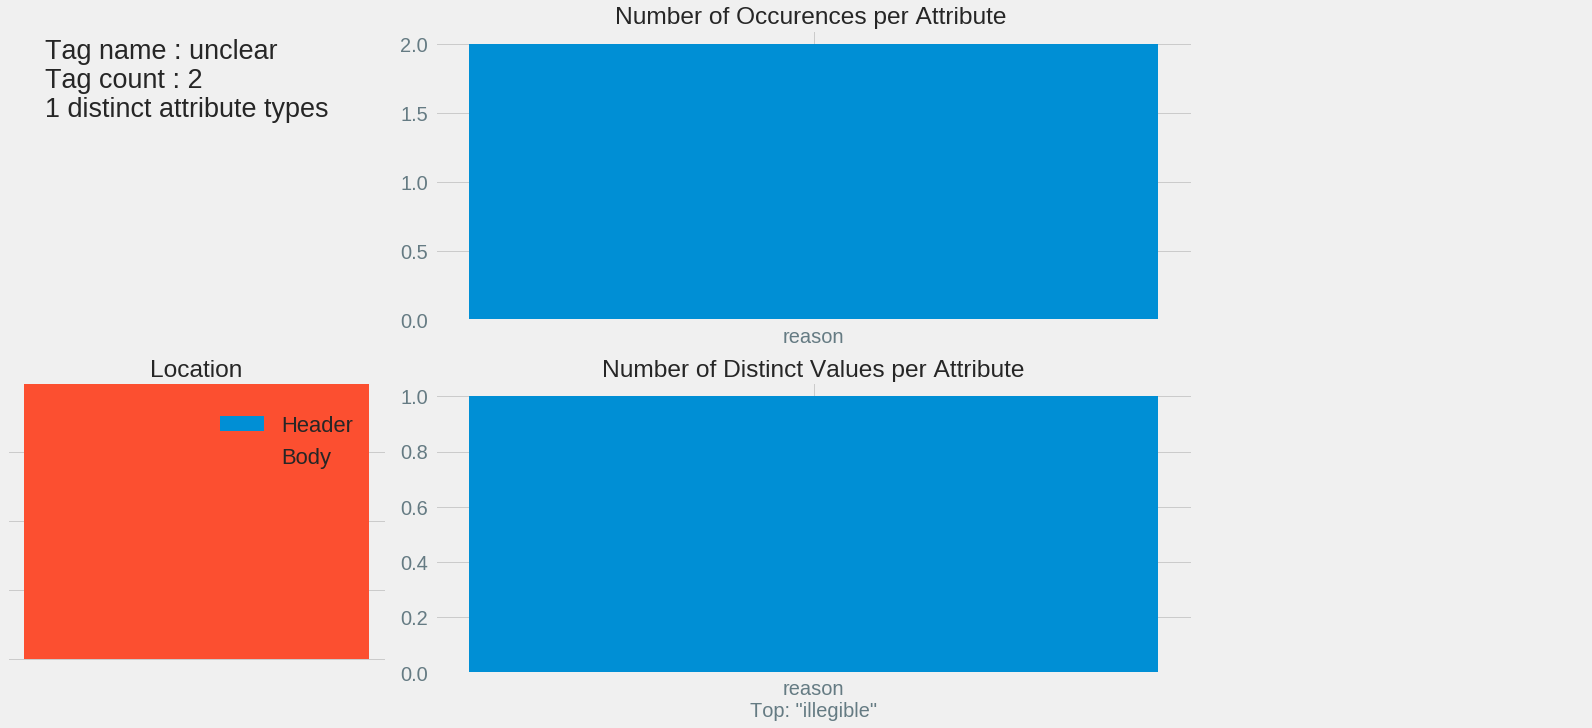

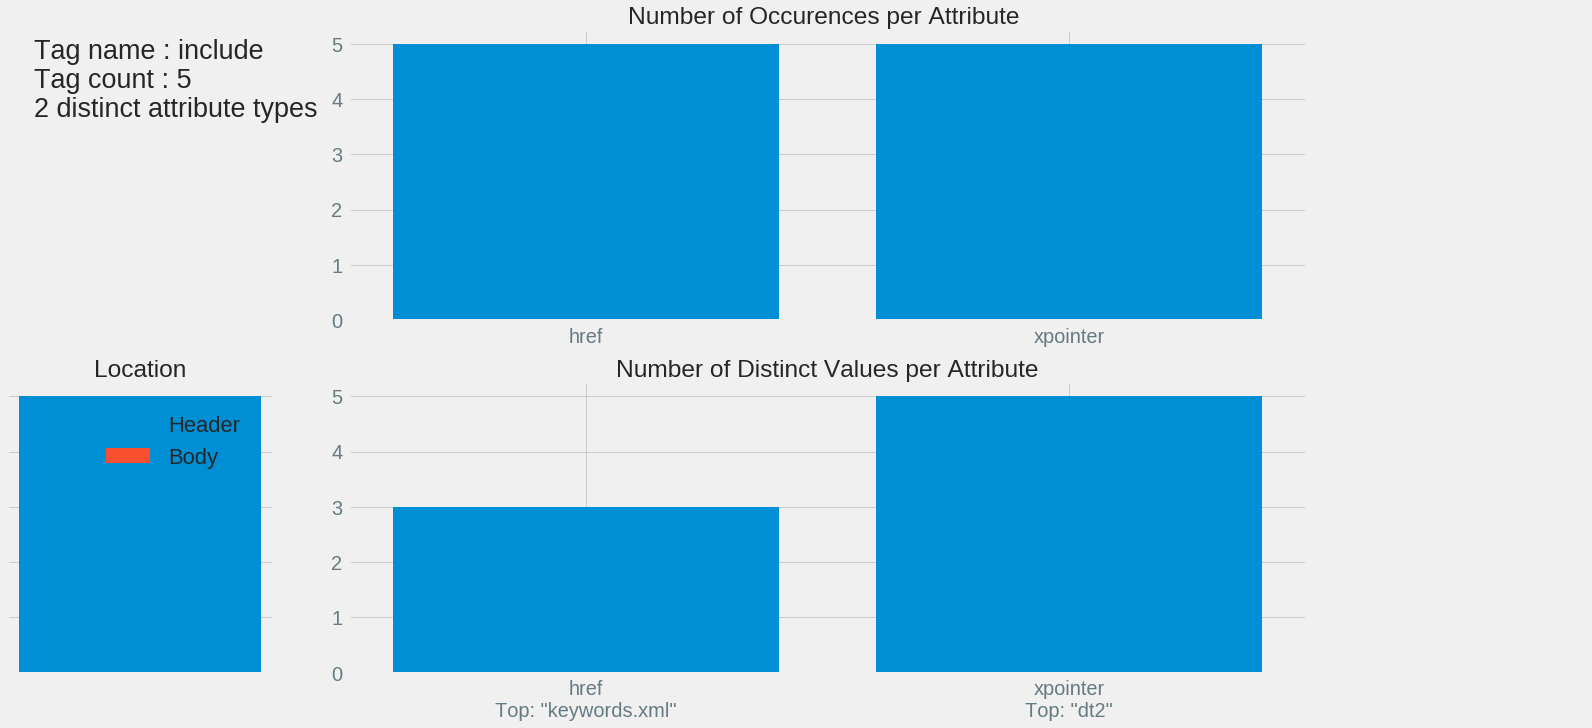

In [536]:
plt.close('all')
plt.style.use('fivethirtyeight')
font = {'weight' : 'normal', 'size'   : 17}
plt.rc('font', **font)
plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rcParams['legend.facecolor'] = 'white'
for tag in list(filter(lambda x: type(x) == str,tags.groups.keys())):
    show_tag(tag, tags)